In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the pre processed dataset
combined_df = pd.read_csv('Dataset/combined_df.csv')
combined_df

HCHO             Location Current date   Next date
0      0.000197       Colombo Proper   2019-01-01  2019-01-02
1      0.000197     Deniyaya, Matara   2019-01-01  2019-01-02
2      0.000197  Nuwara Eliya Proper   2019-01-01  2019-01-02
3      0.000088   Bibile, Monaragala   2019-01-01  2019-01-02
4      0.000088    Kurunegala Proper   2019-01-01  2019-01-02
...         ...                  ...          ...         ...
12777  0.000080  Nuwara Eliya Proper   2023-12-31  2024-01-01
12778  0.000065   Bibile, Monaragala   2023-12-31  2024-01-01
12779  0.000065    Kurunegala Proper   2023-12-31  2024-01-01
12780  0.000065        Jaffna Proper   2023-12-31  2024-01-01
12781  0.000065         Kandy Proper   2023-12-31  2024-01-01

[12782 rows x 4 columns]

In [3]:
# seasonal variations
combined_df['Current date'] = pd.to_datetime(combined_df['Current date'])
combined_df['Next date'] = pd.to_datetime(combined_df['Next date'])

combined_df['Year'] = combined_df['Current date'].dt.year
combined_df['Month'] = combined_df['Current date'].dt.month
combined_df['Week'] = combined_df['Current date'].dt.isocalendar().week

# Grouping data by year and month for seasonal analysis
seasonal_data = combined_df.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

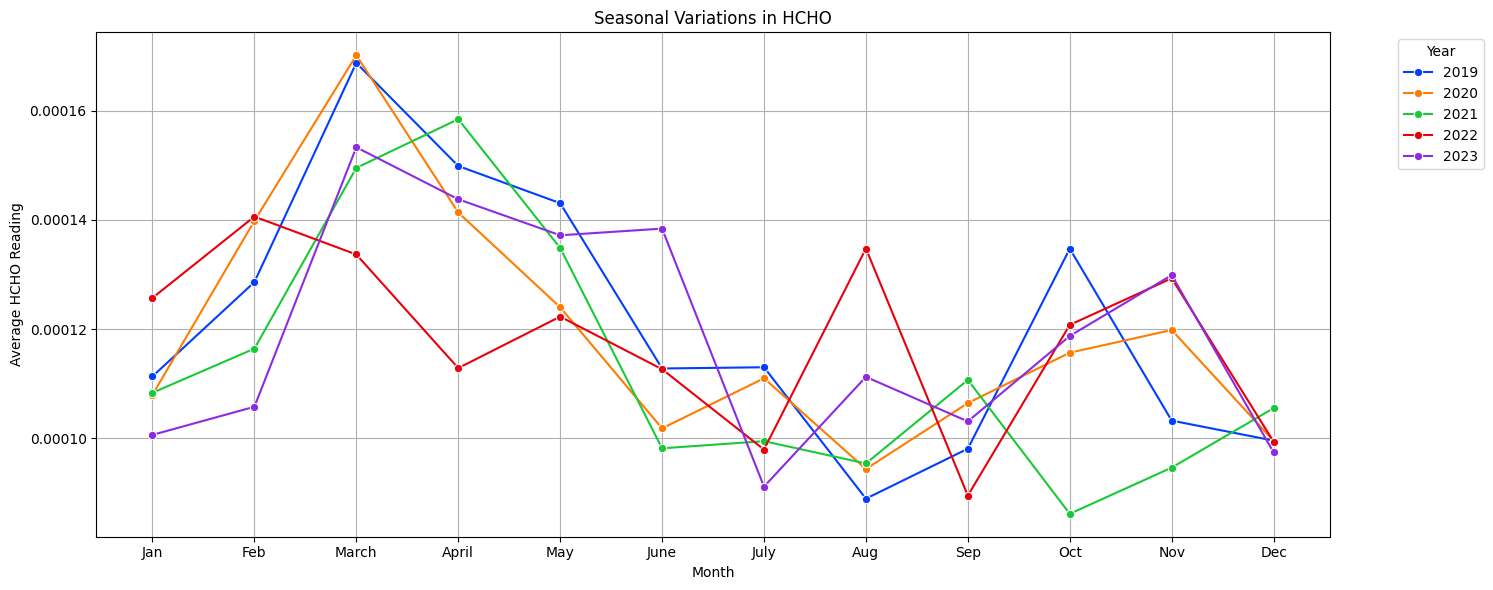

In [4]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
palette = sns.color_palette("bright")
sns.lineplot(x="Month", y="HCHO", hue="Year", data=seasonal_data, marker='o', palette=palette)
plt.title('Seasonal Variations in HCHO')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

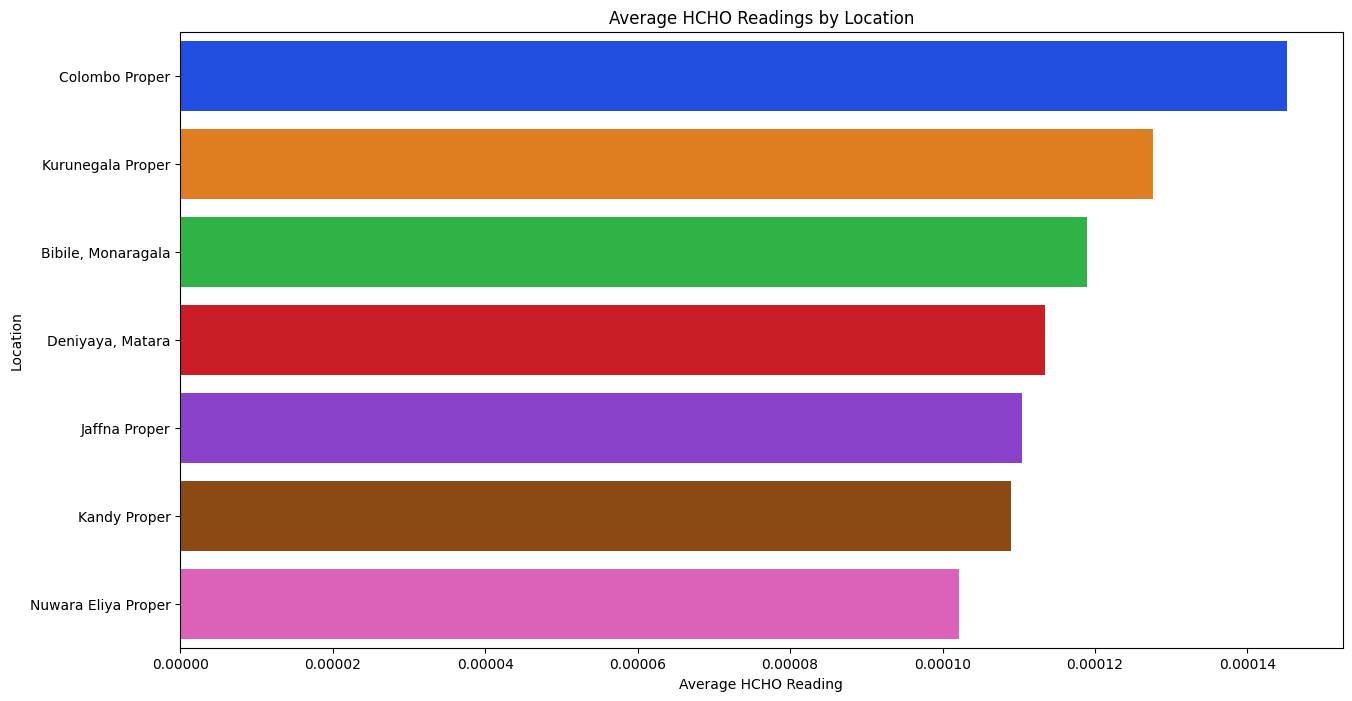

In [5]:
# Grouping the data by location and aggregating HCHO readings
city_data = combined_df.groupby('Location')['HCHO'].mean().sort_values(ascending=False).reset_index()

# Plotting the HCHO levels for different cities
plt.figure(figsize=(15, 8))
sns.barplot(x='HCHO', y='Location', data=city_data, palette=palette)
plt.title('Average HCHO Readings by Location')
plt.xlabel('Average HCHO Reading')
plt.ylabel('Location')
plt.show()

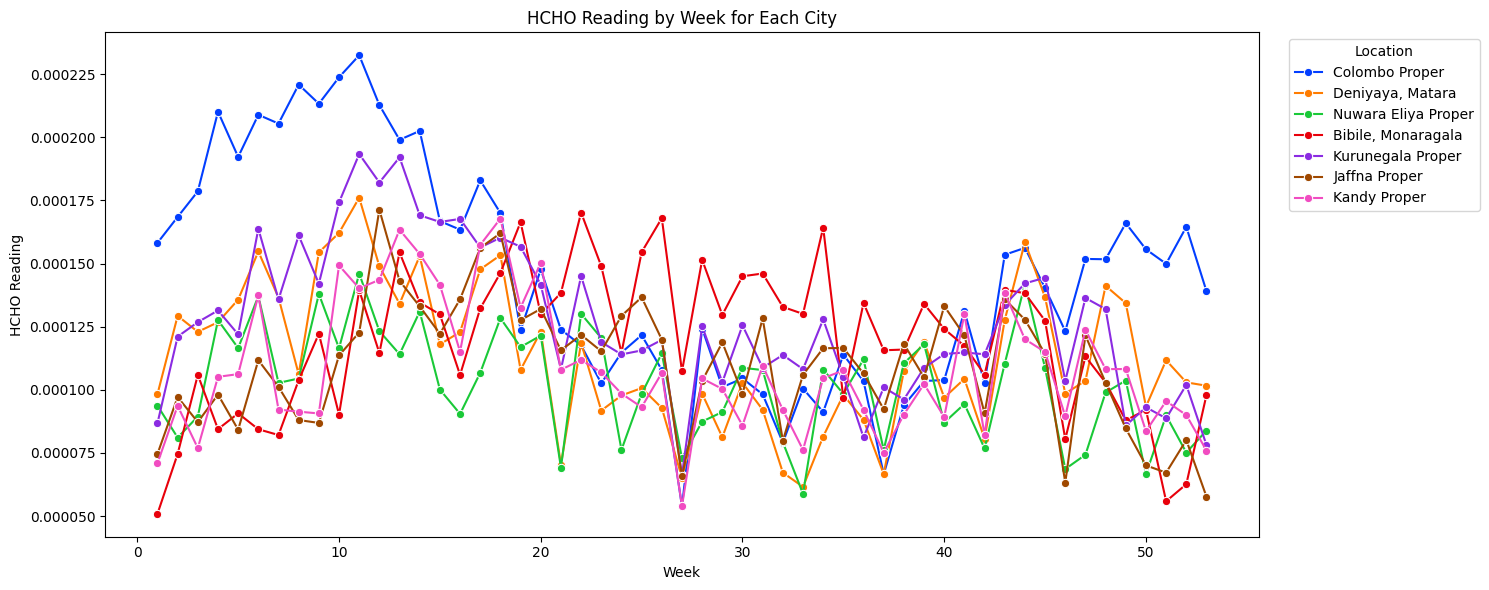

In [6]:
# weekly means for each city
plt.figure(figsize=(15,6))
sns.lineplot(data=combined_df, x='Week', y='HCHO', hue='Location', marker='o', errorbar=None, palette=palette)
plt.title('HCHO Reading by Week for Each City')
plt.xlabel('Week')
plt.ylabel('HCHO Reading')
plt.legend(title='Location', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

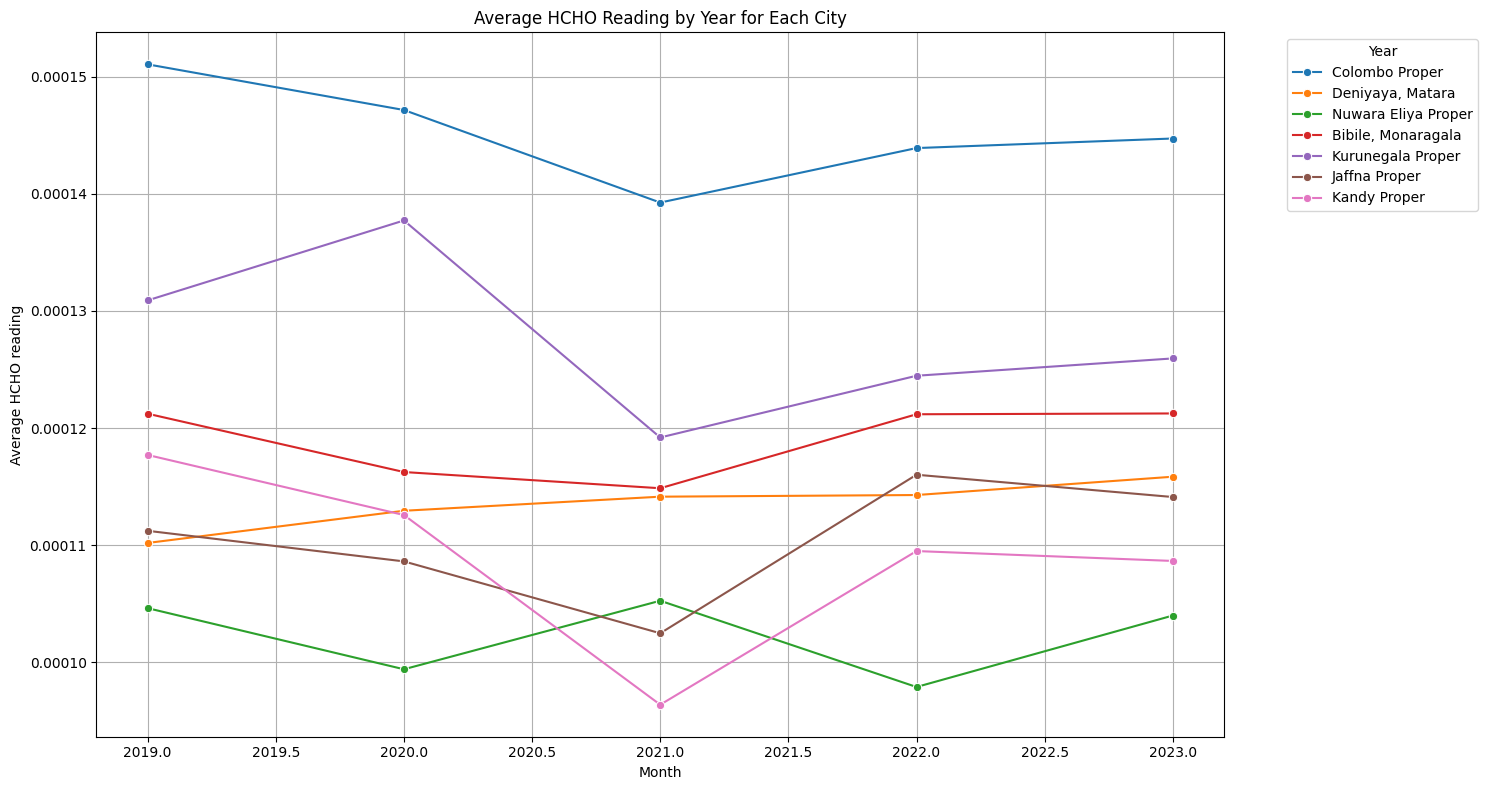

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year', y='HCHO', hue='Location', data=combined_df, marker='o', errorbar=None)
plt.title('Average HCHO Reading by Year for Each City')
plt.xlabel('Month')
plt.ylabel('Average HCHO reading')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Covid 19 lockdown impact

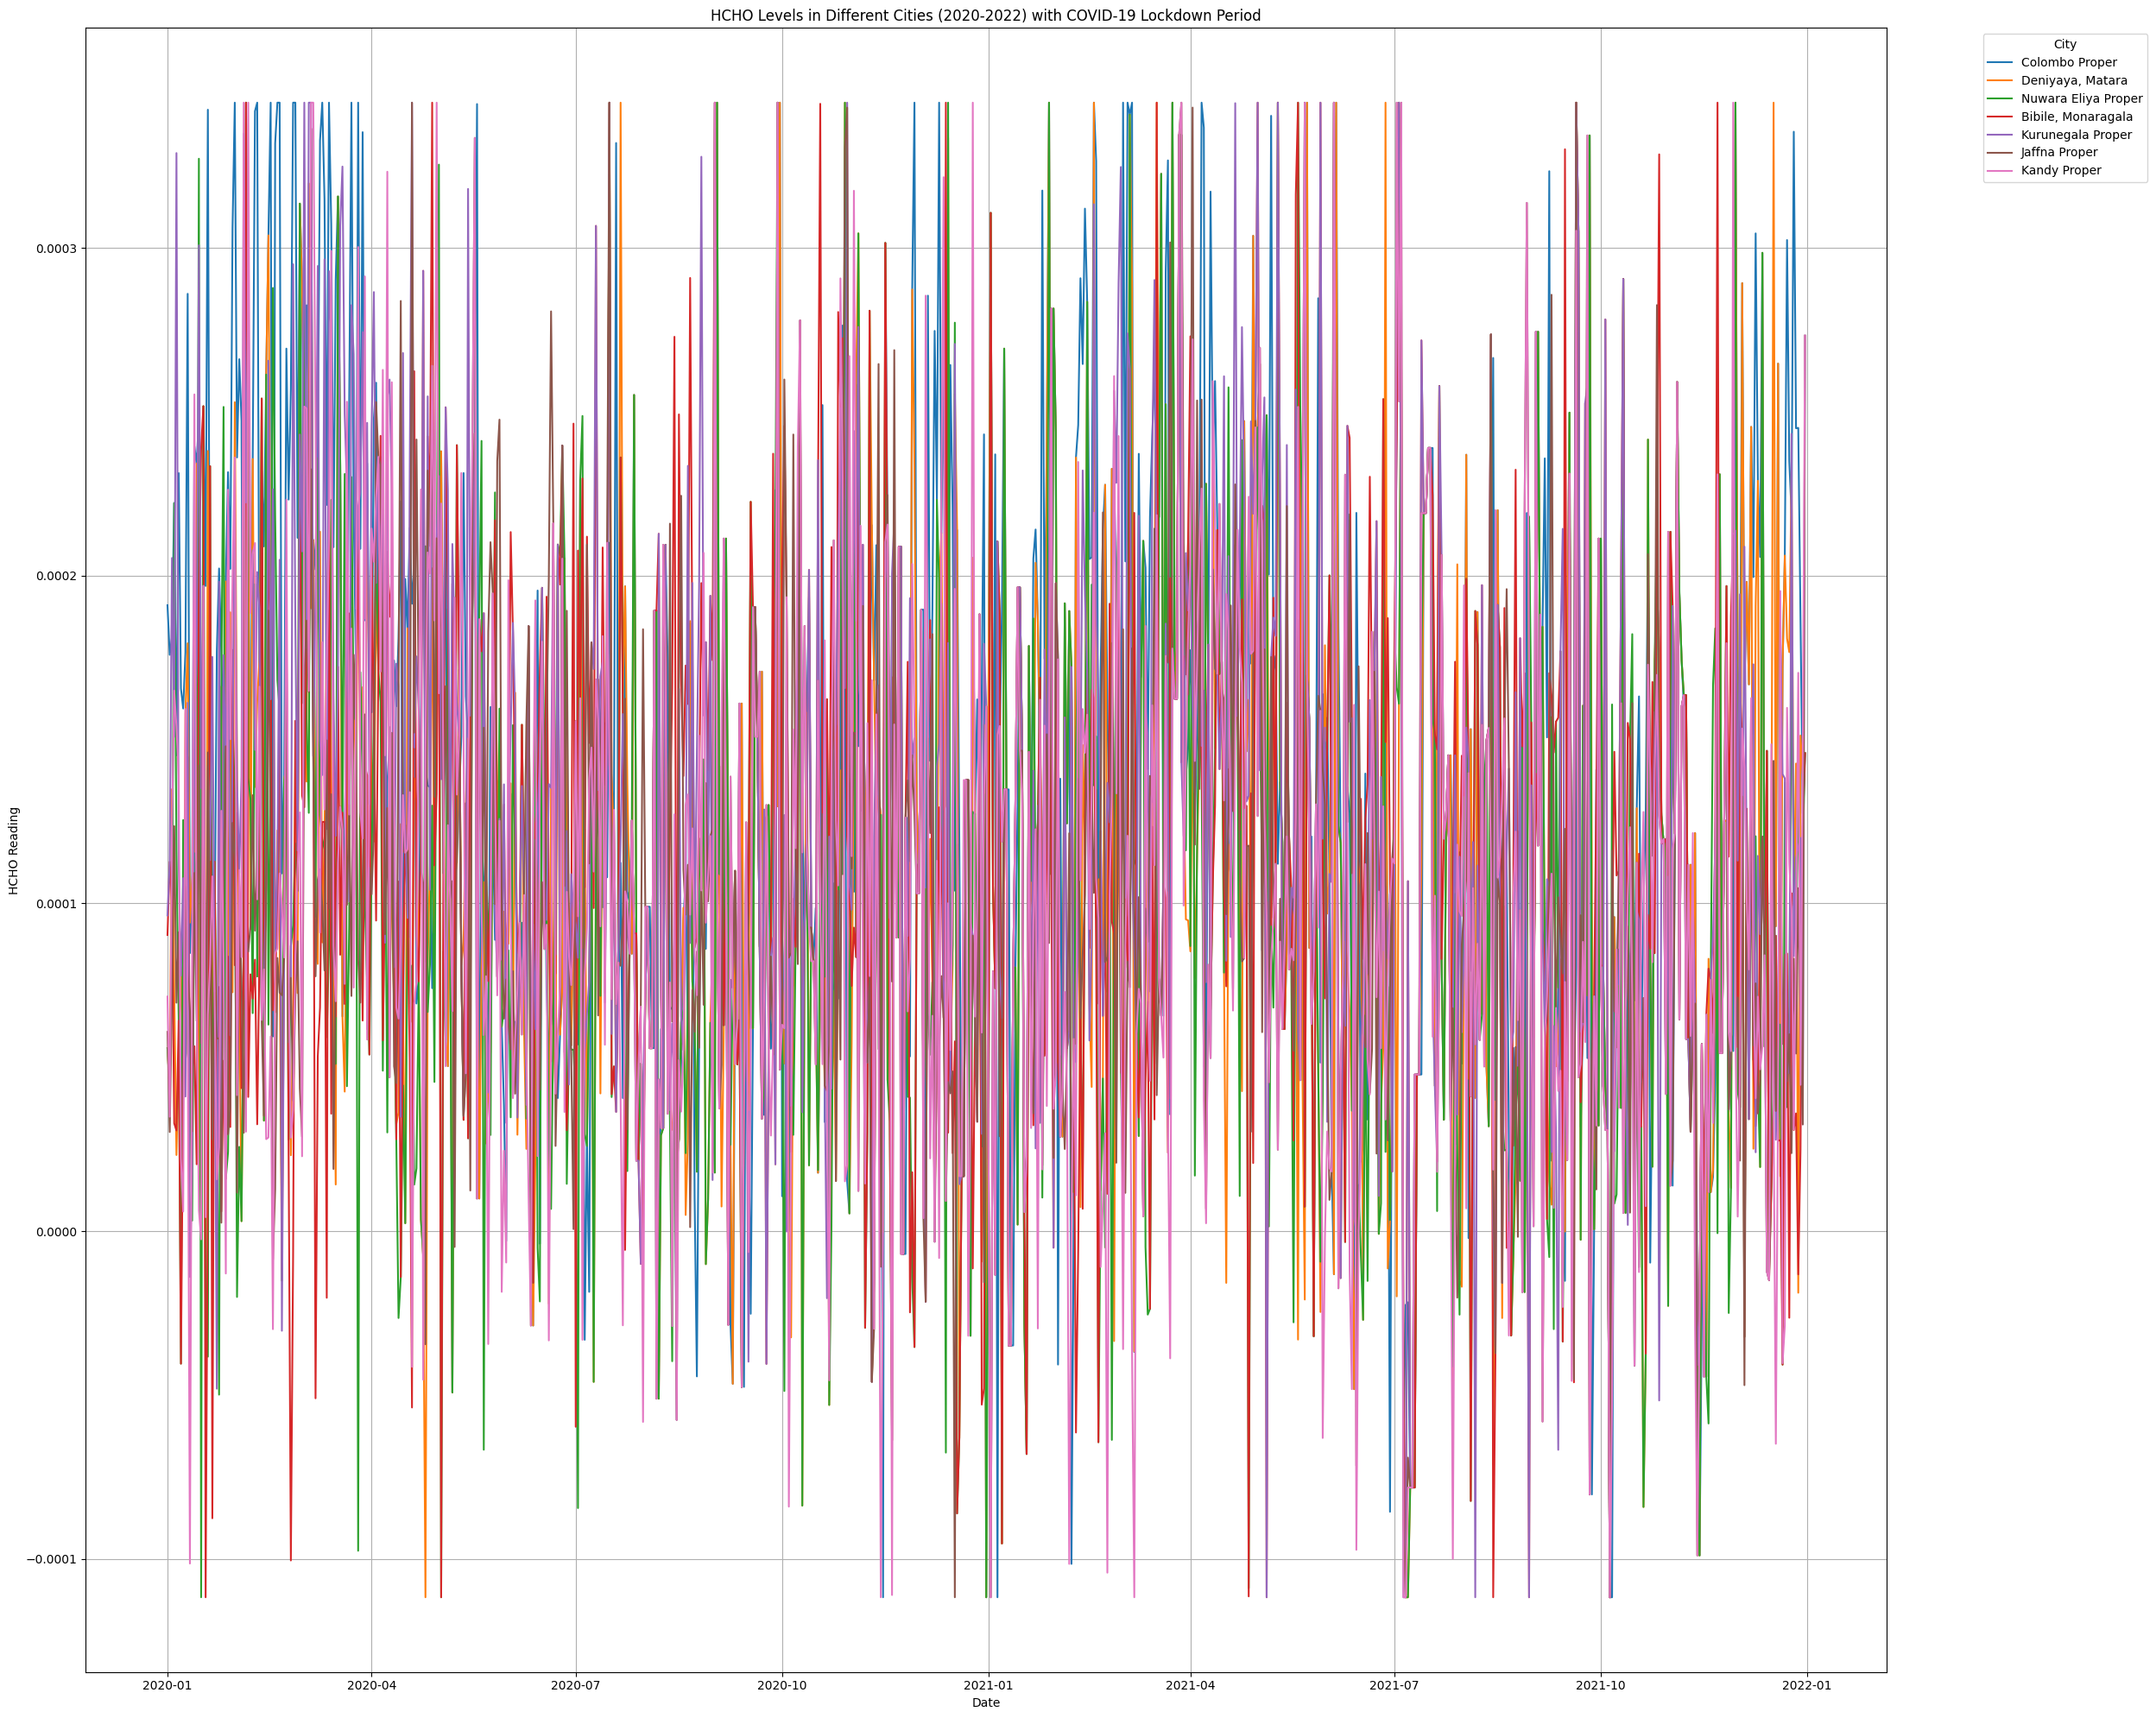

In [8]:
# Get unique locations
unique_locations = combined_df['Location'].unique()

covid_period_data = combined_df[(combined_df['Year'] >= 2020) & (combined_df['Year'] <= 2021)]

# Plotting HCHO levels for different cities during 2019-2020
plt.figure(figsize=(25, 20))
for location in unique_locations:
    city_data = covid_period_data[covid_period_data['Location'] == location]
    sns.lineplot(x='Current date', y='HCHO', data=city_data, label=location)
    
    
plt.title('HCHO Levels in Different Cities (2020-2022) with COVID-19 Lockdown Period')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

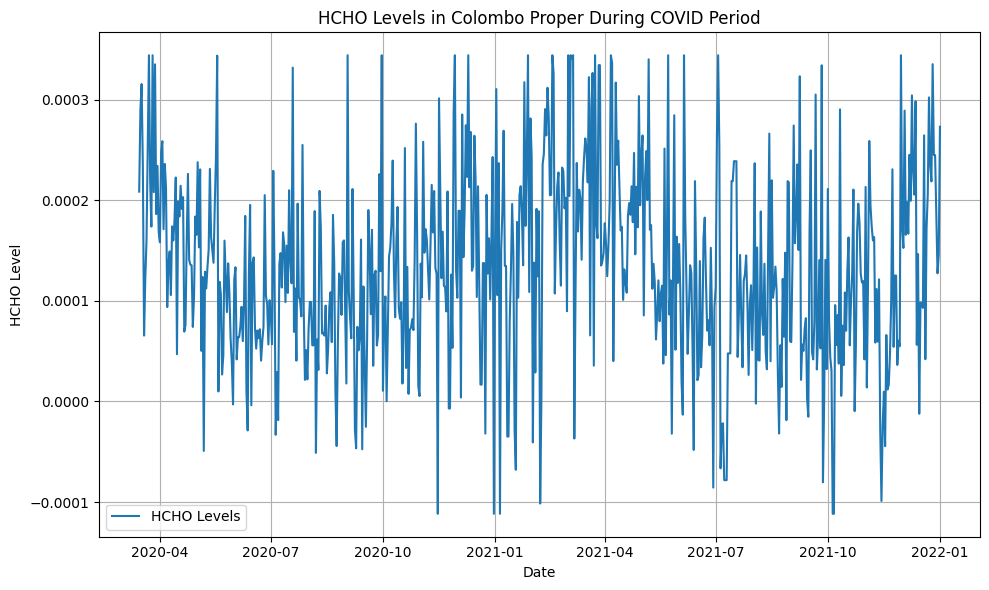

Mean HCHO levels in Colombo Proper:
Pre-COVID: 0.00016419085487377996
During COVID: 0.00013376558370895852
Post-COVID: 0.00014413998728524262


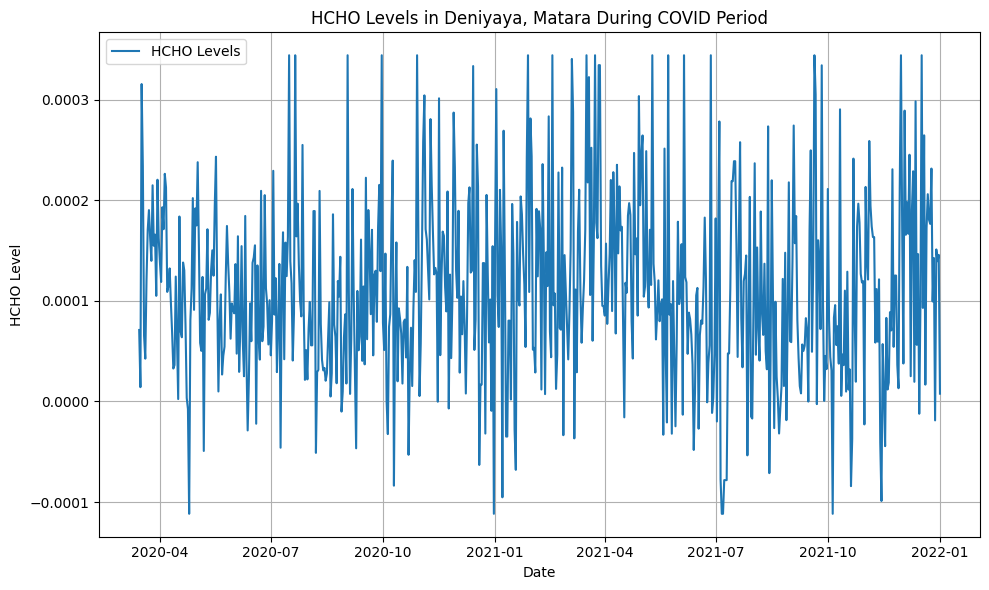

Mean HCHO levels in Deniyaya, Matara:
Pre-COVID: 0.00011438064960685291
During COVID: 0.00011095104869206006
Post-COVID: 0.00011520643294784729


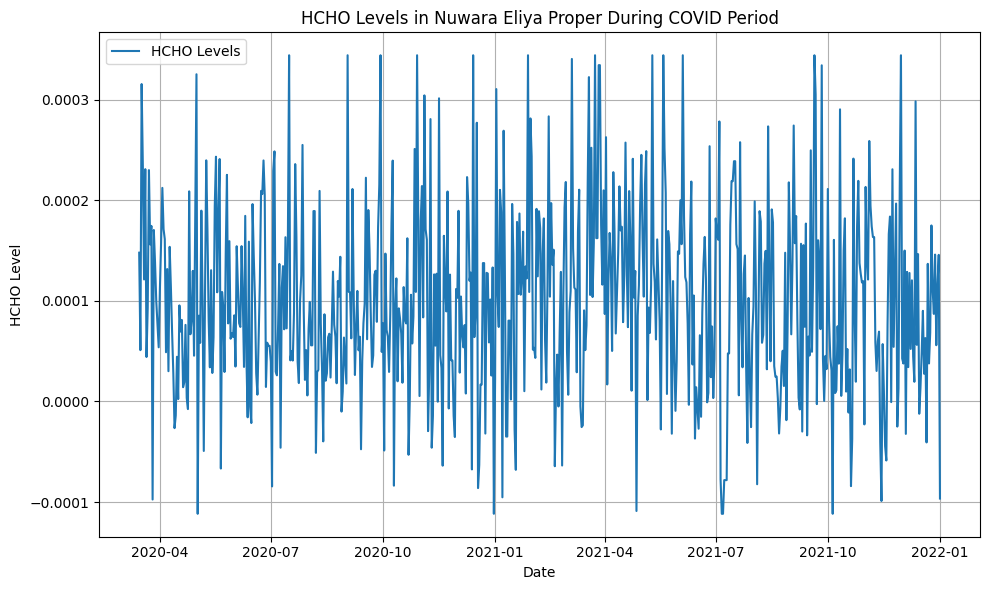

Mean HCHO levels in Nuwara Eliya Proper:
Pre-COVID: 0.00010688492720328902
During COVID: 0.0001002455795582544
Post-COVID: 0.00010120517334799341


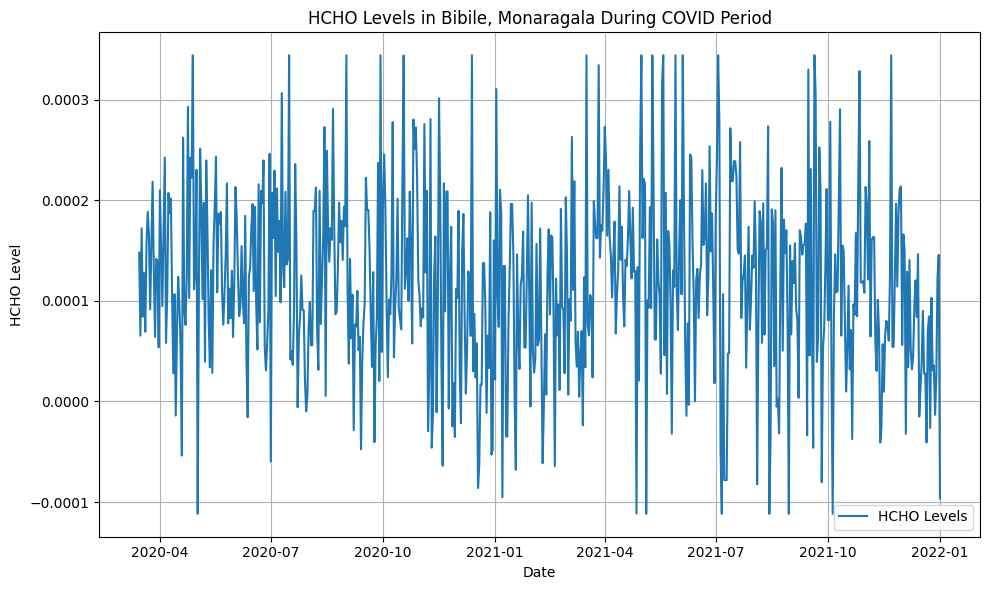

Mean HCHO levels in Bibile, Monaragala:
Pre-COVID: 0.00011646276686692911
During COVID: 0.00011776573626440579
Post-COVID: 0.00012150880129932713


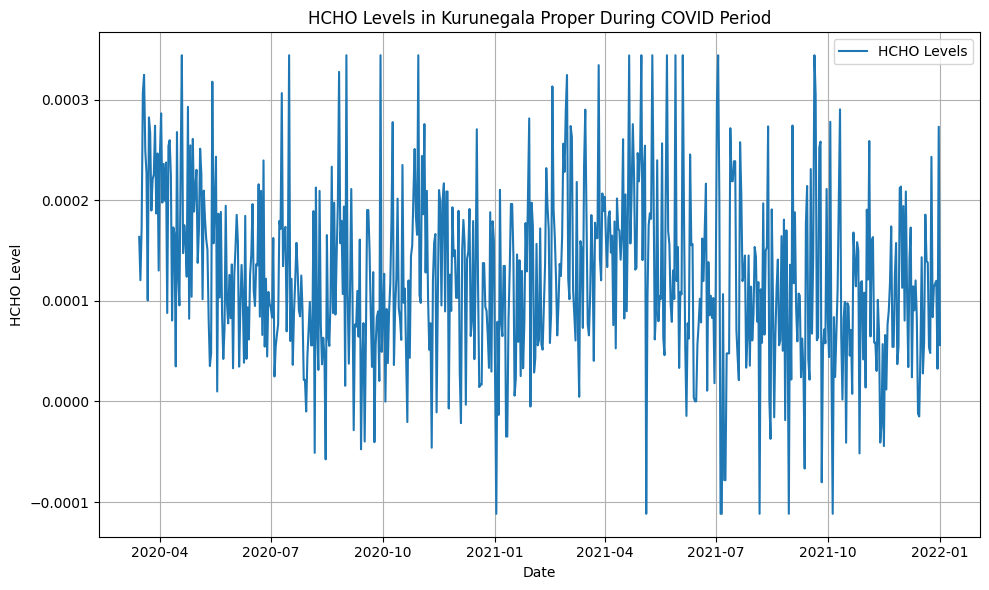

Mean HCHO levels in Kurunegala Proper:
Pre-COVID: 0.0001362629565870312
During COVID: 0.00012451119902587434
Post-COVID: 0.00012529898461318423


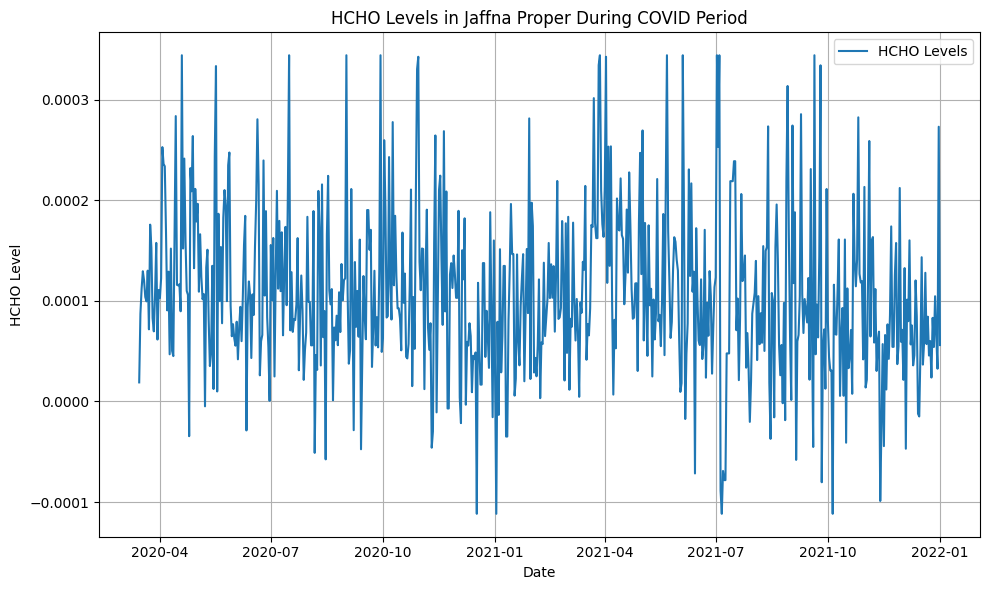

Mean HCHO levels in Jaffna Proper:
Pre-COVID: 0.00010733549787751874
During COVID: 0.00010742490492241578
Post-COVID: 0.00011514048341284485


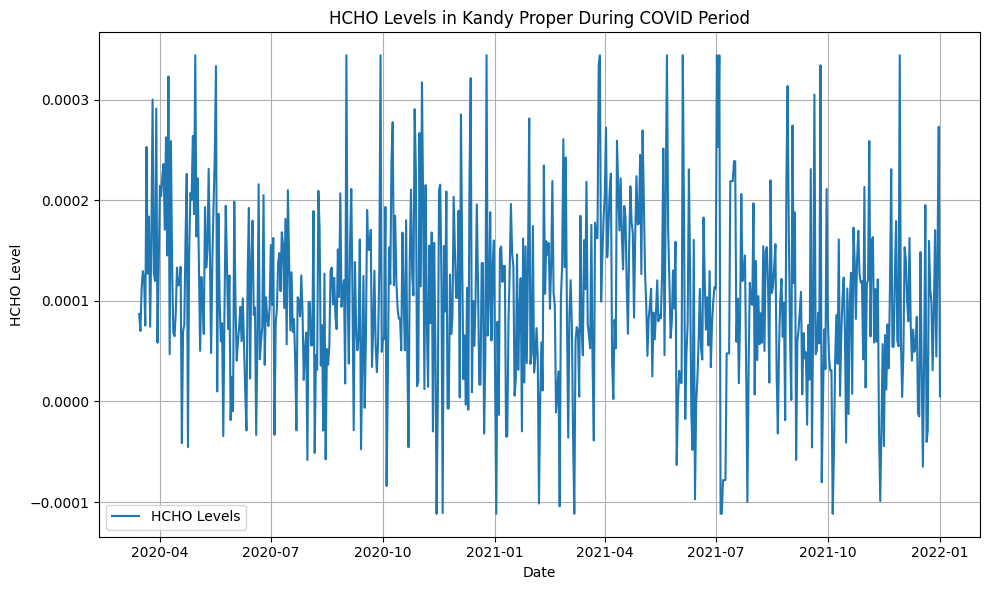

Mean HCHO levels in Kandy Proper:
Pre-COVID: 0.00011808399450647088
During COVID: 0.00010258652691374019
Post-COVID: 0.00010921295070547405


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming combined_df is already defined and loaded with data

# Get unique locations
unique_locations = combined_df['Location'].unique()

# Define date ranges for the pandemic, pre-pandemic, and post-pandemic periods
covid_start_date = pd.to_datetime('2020-03-15')
covid_end_date = pd.to_datetime('2022-01-01')
pre_pandemic_end_date = pd.to_datetime('2020-03-14')
post_pandemic_start_date = pd.to_datetime('2022-01-02')

for location in unique_locations:
    location_data = combined_df[combined_df['Location'] == location]

    # Calculate mean HCHO levels for each period
    pre_covid_mean = location_data[location_data['Current date'] <= pre_pandemic_end_date]['HCHO'].mean()
    covid_mean = location_data[(location_data['Current date'] >= covid_start_date) & 
                               (location_data['Current date'] <= covid_end_date)]['HCHO'].mean()
    post_covid_mean = location_data[location_data['Current date'] >= post_pandemic_start_date]['HCHO'].mean()

    # Filter data for COVID period for plotting
    covid_period_data = location_data[(location_data['Current date'] >= covid_start_date) & 
                                      (location_data['Current date'] <= covid_end_date)]
    
    # Visualize only the COVID period
    plt.figure(figsize=(10, 6))
    plt.plot(covid_period_data['Current date'], covid_period_data['HCHO'], label='HCHO Levels')
    plt.title(f'HCHO Levels in {location} During COVID Period')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print mean HCHO levels for each period
    print(f"Mean HCHO levels in {location}:")
    print("Pre-COVID:", pre_covid_mean)
    print("During COVID:", covid_mean)
    print("Post-COVID:", post_covid_mean)


For each city we can see that during the lockdown periods the mean of HCHO Levels are getting lower. It ensures that the reduce of human activities will make the air will better reducing those toxic HCHO gas.

In [10]:
combined_df

HCHO             Location Current date  Next date  Year  Month  \
0      0.000197       Colombo Proper   2019-01-01 2019-01-02  2019      1   
1      0.000197     Deniyaya, Matara   2019-01-01 2019-01-02  2019      1   
2      0.000197  Nuwara Eliya Proper   2019-01-01 2019-01-02  2019      1   
3      0.000088   Bibile, Monaragala   2019-01-01 2019-01-02  2019      1   
4      0.000088    Kurunegala Proper   2019-01-01 2019-01-02  2019      1   
...         ...                  ...          ...        ...   ...    ...   
12777  0.000080  Nuwara Eliya Proper   2023-12-31 2024-01-01  2023     12   
12778  0.000065   Bibile, Monaragala   2023-12-31 2024-01-01  2023     12   
12779  0.000065    Kurunegala Proper   2023-12-31 2024-01-01  2023     12   
12780  0.000065        Jaffna Proper   2023-12-31 2024-01-01  2023     12   
12781  0.000065         Kandy Proper   2023-12-31 2024-01-01  2023     12   

       Week  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
12777    52  
12778    52  
12779    52  
12780    52  
12781    52  

[12782 rows x 7 columns]

### Gas Emission and Long term trends

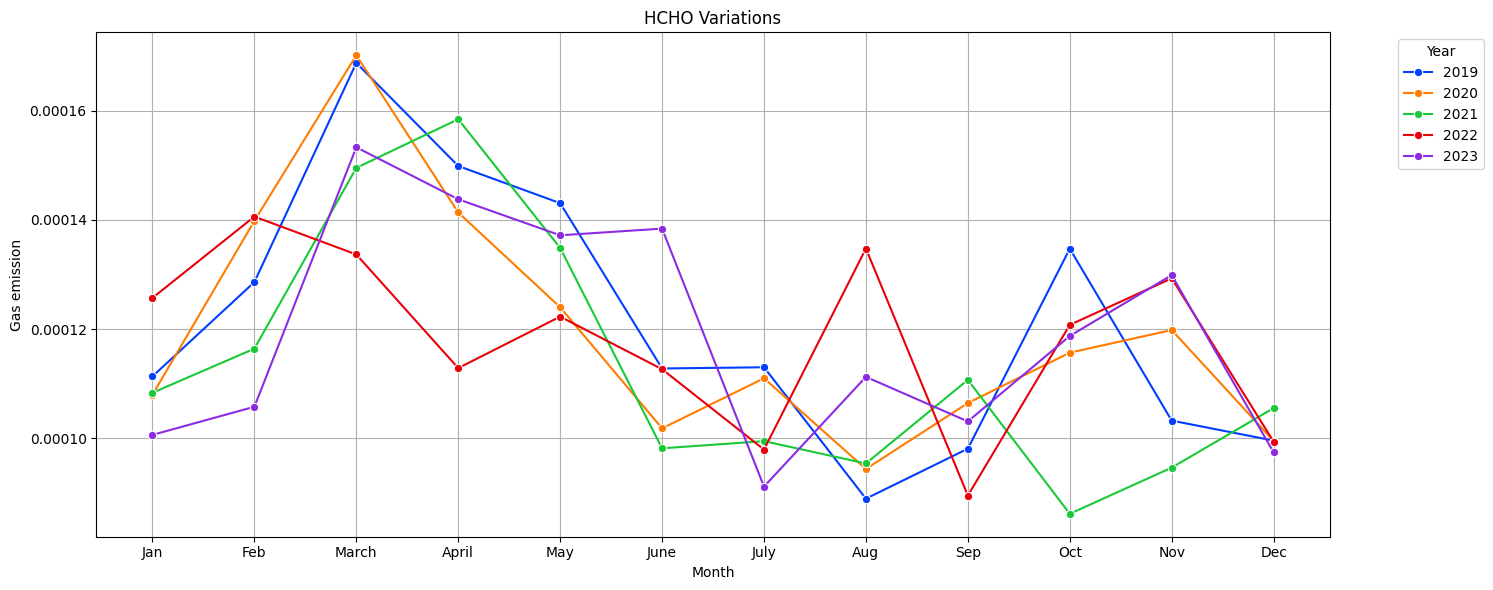

In [11]:
# HCHO to float
combined_df['HCHO'] = pd.to_numeric(combined_df['HCHO'], errors='coerce')

# Date to datetime
combined_df['Current date'] = pd.to_datetime(combined_df['Current date'])
combined_df['Next date'] = pd.to_datetime(combined_df['Next date'])

# Plotting seasonal variations
plt.figure(figsize=(15, 6))
palette = sns.color_palette("bright")
sns.lineplot(x="Month", y="HCHO", hue="Year", data=seasonal_data, marker='o', palette=palette, errorbar=None)
plt.title('HCHO Variations')
plt.xlabel('Month')
plt.ylabel('Gas emission')
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

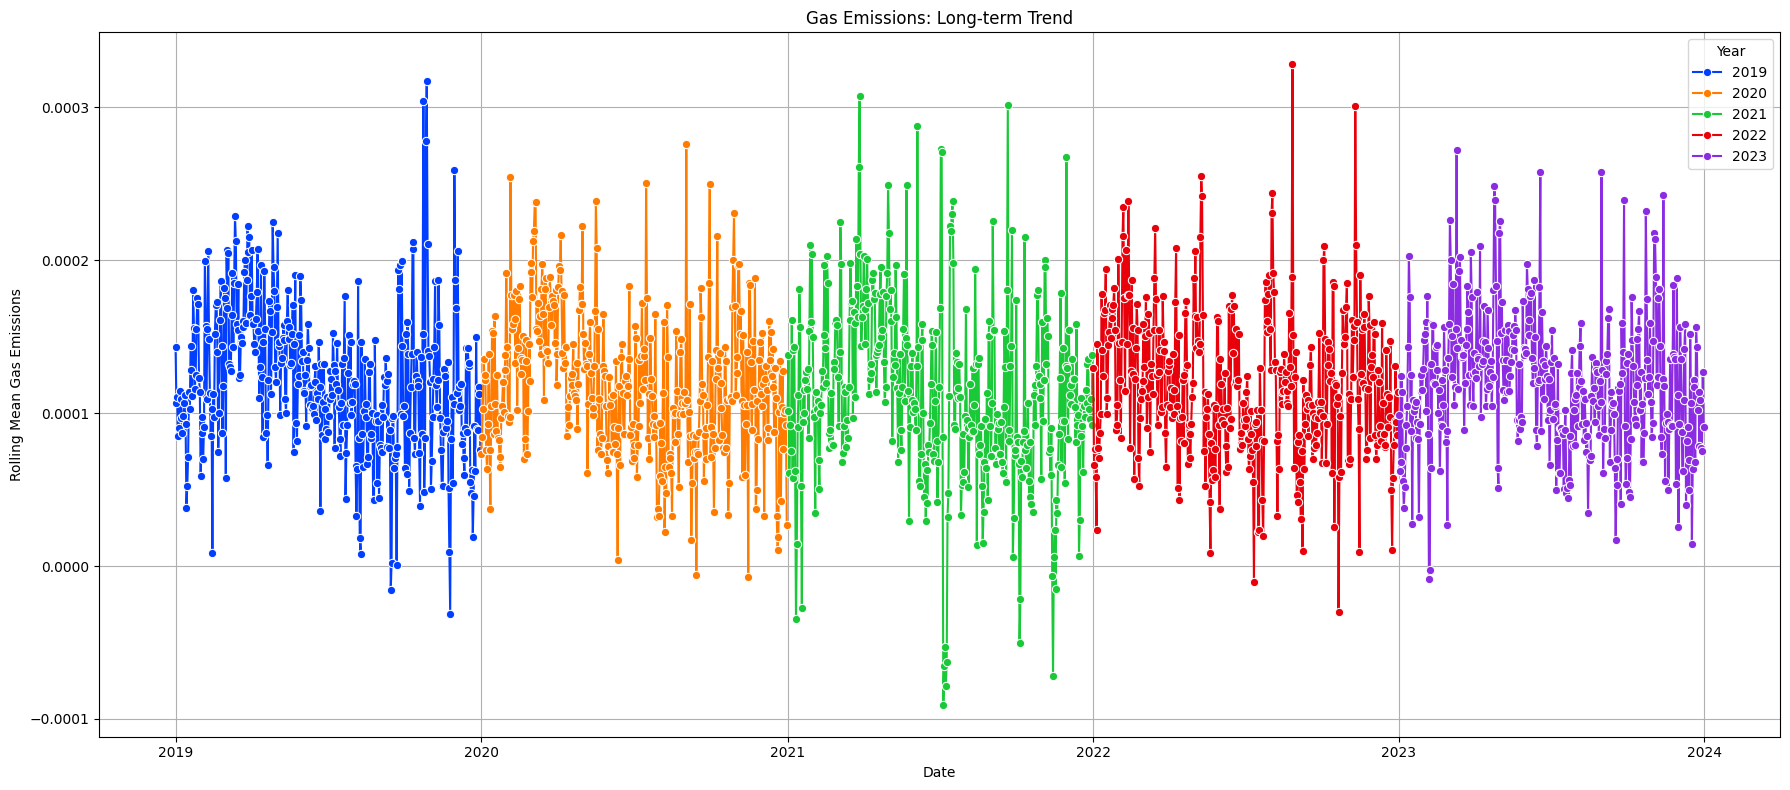

In [12]:
# Identify long-term trends (using rolling mean)
plt.figure(figsize=(18, 8)) 
combined_df['Rolling_Mean'] = combined_df['HCHO'].rolling(window=7).mean()
sns.lineplot(x='Current date', y='Rolling_Mean', data=combined_df, marker='o', hue="Year", errorbar=None, palette=palette)
plt.title('Gas Emissions: Long-term Trend')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Gas Emissions')
plt.grid(True)
plt.tight_layout()

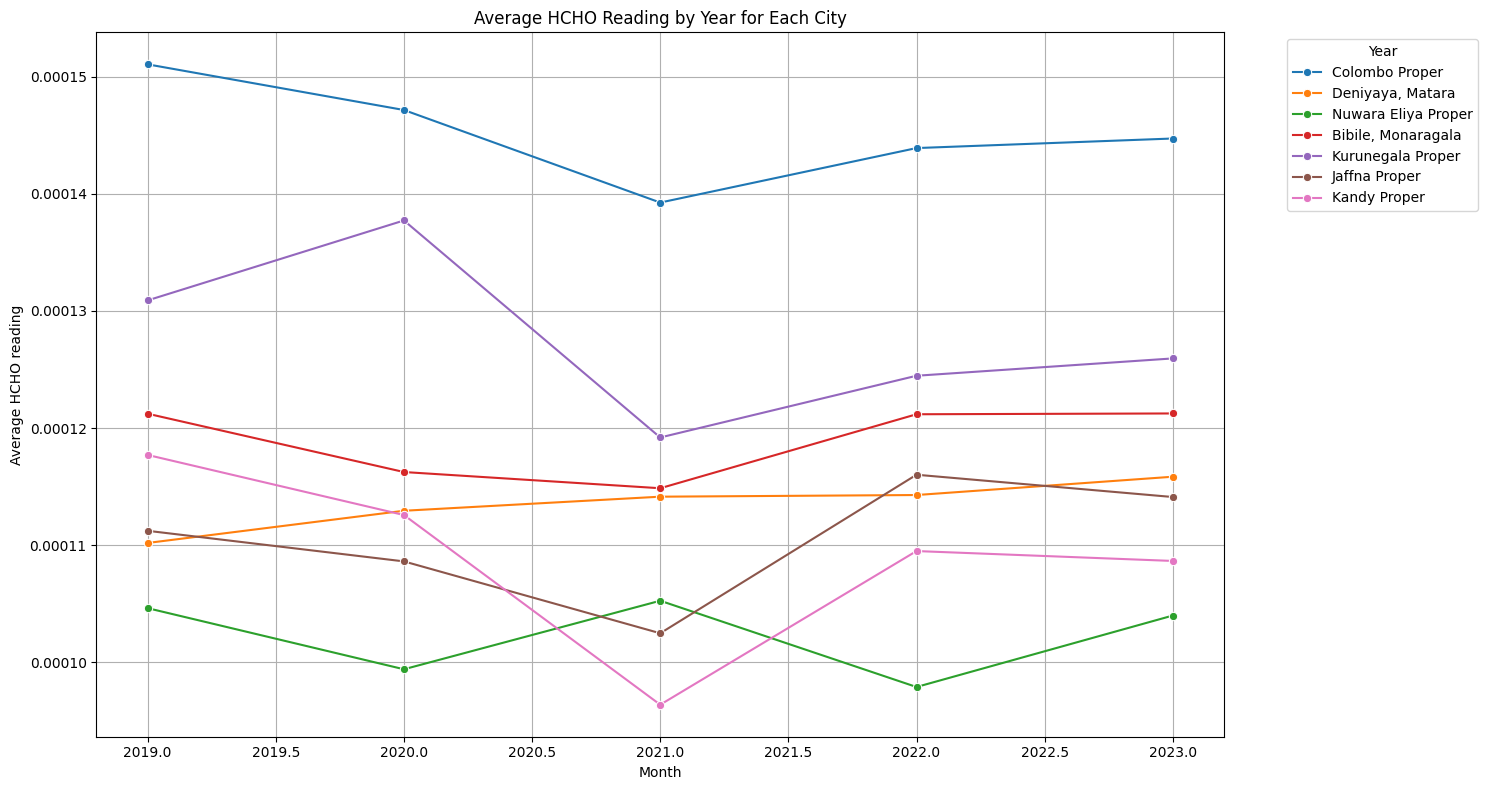

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year', y='HCHO', hue='Location', data=combined_df, marker='o', errorbar=None)
plt.title('Average HCHO Reading by Year for Each City')
plt.xlabel('Month')
plt.ylabel('Average HCHO reading')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

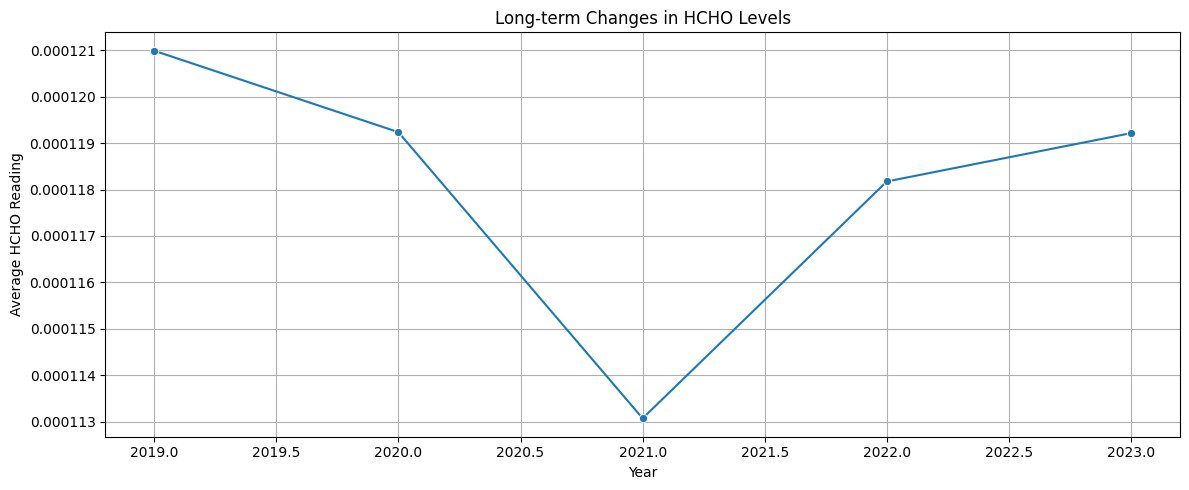

In [14]:
long_term_trend = combined_df.groupby('Year')['HCHO'].mean().reset_index()

# Plotting long-term changes
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='HCHO', data=long_term_trend, marker='o')
plt.title('Long-term Changes in HCHO Levels')
plt.xlabel('Year')
plt.ylabel('Average HCHO Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

### City by city changes

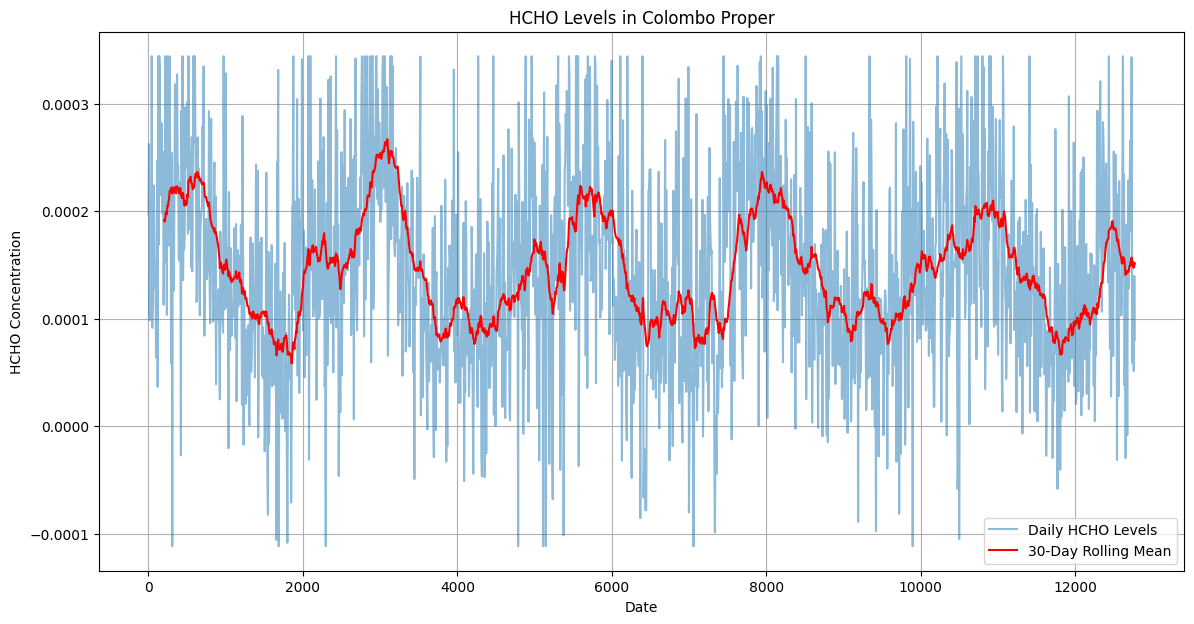

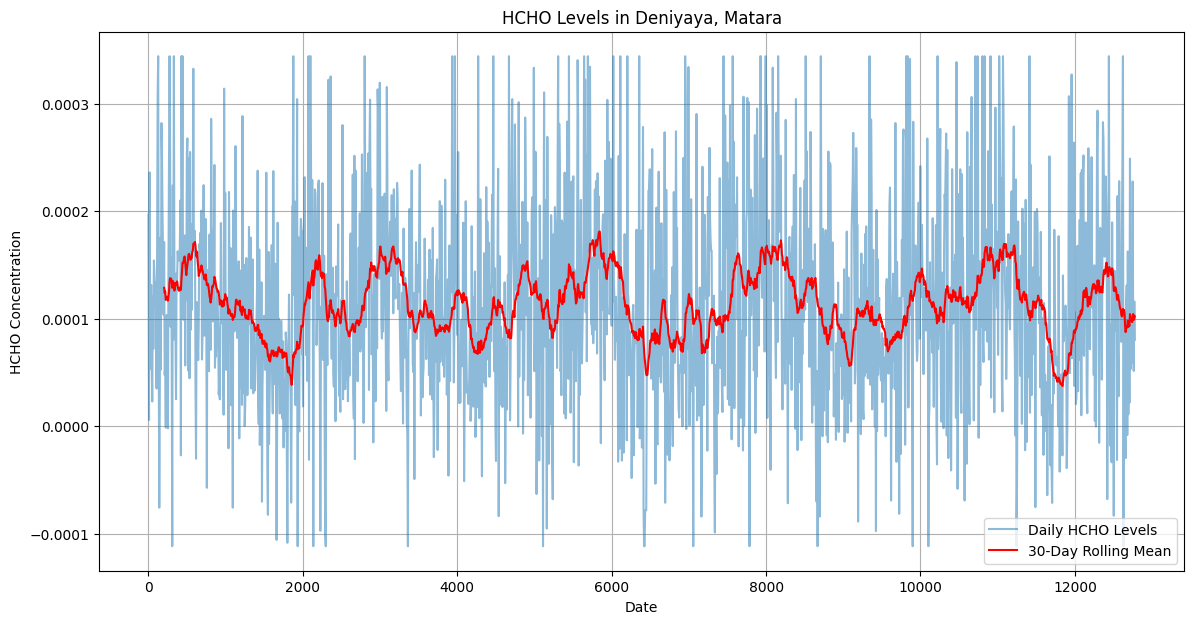

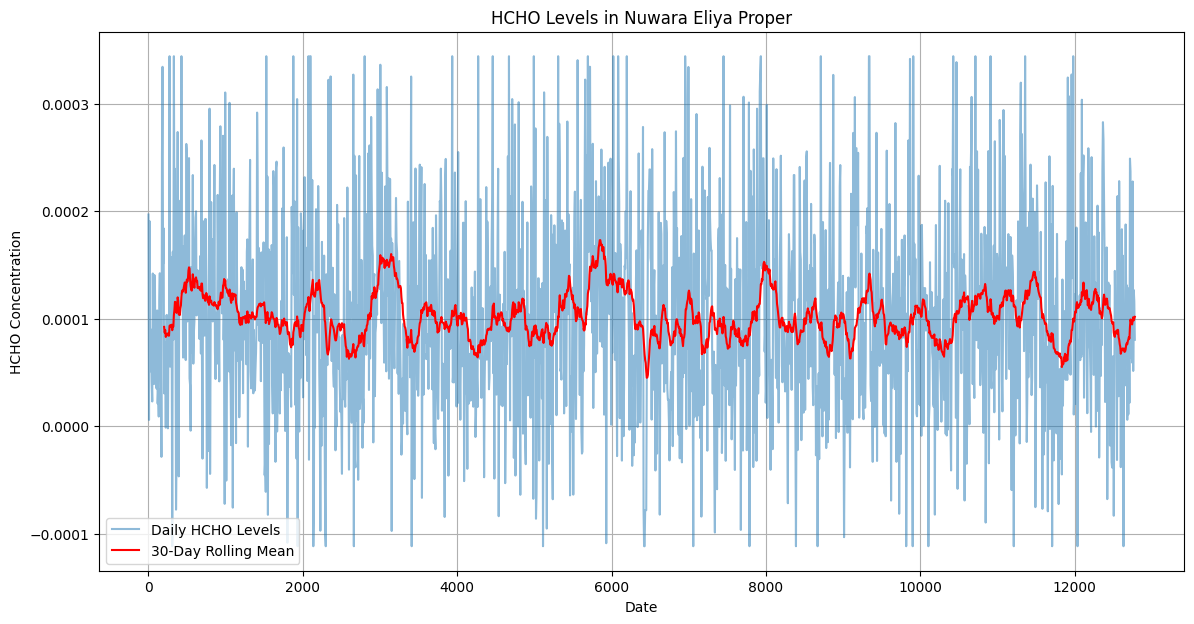

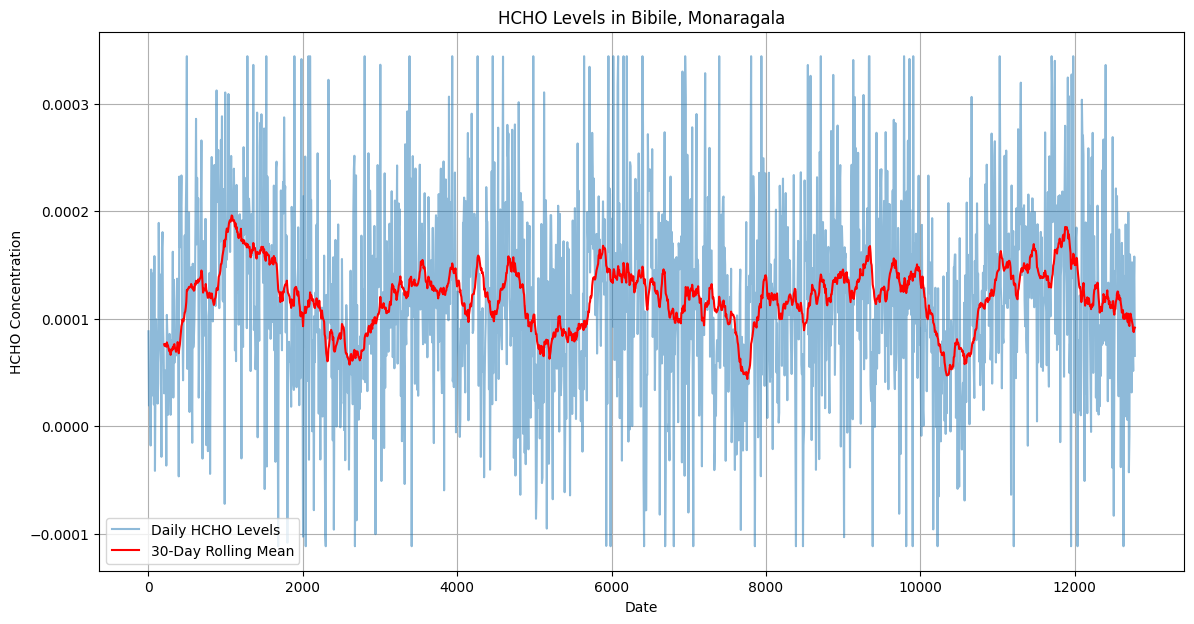

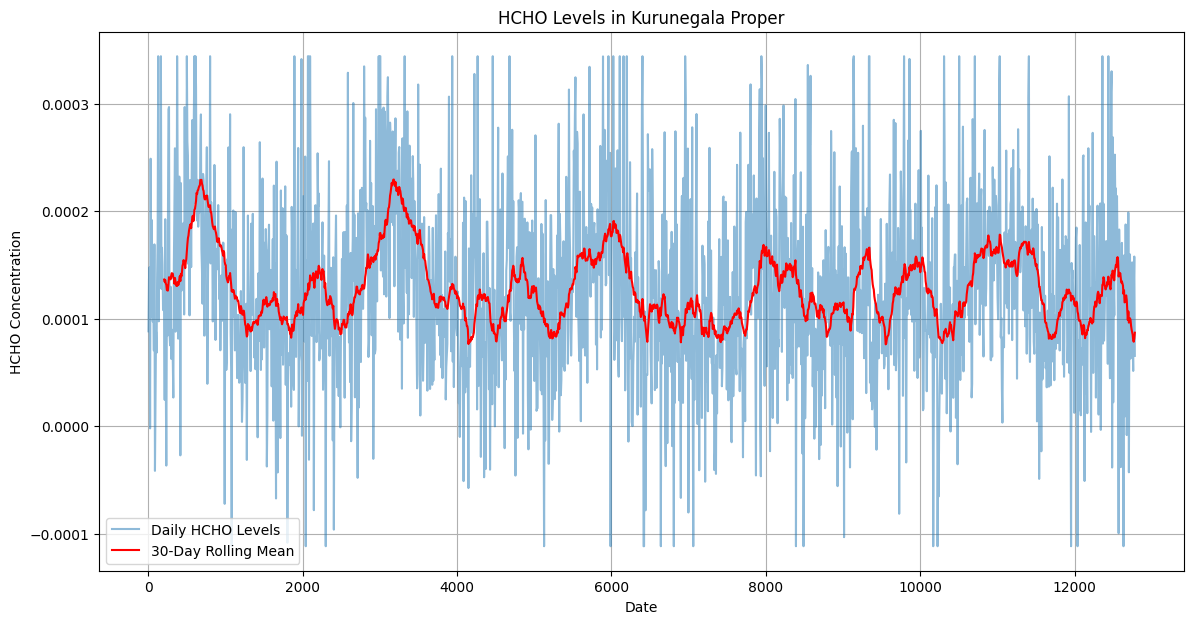

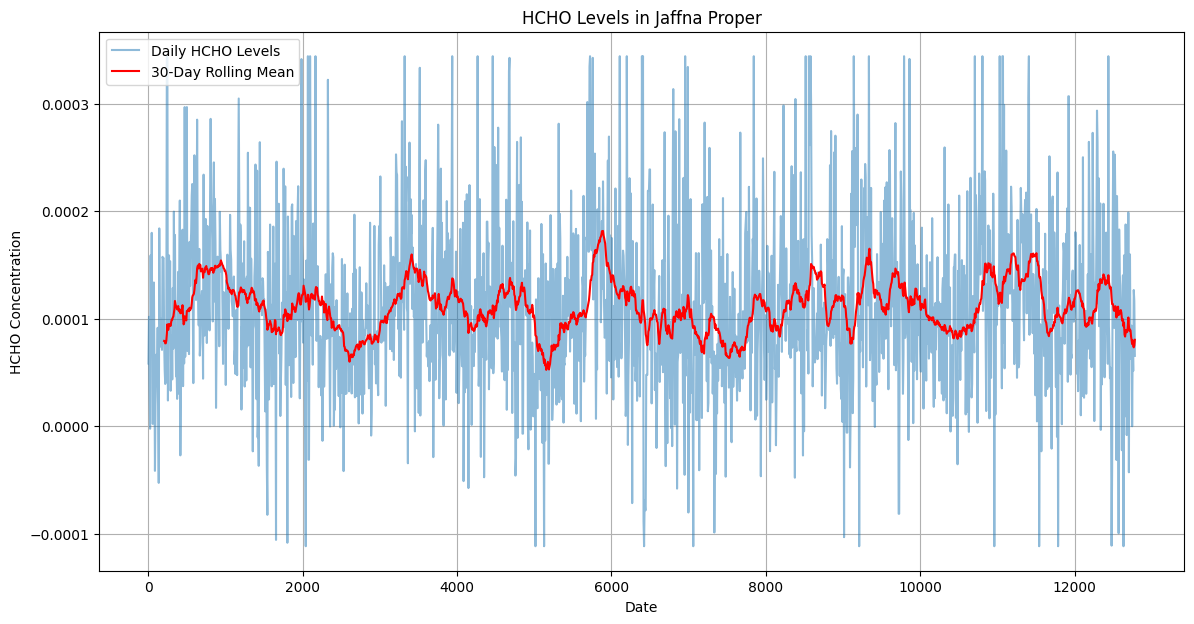

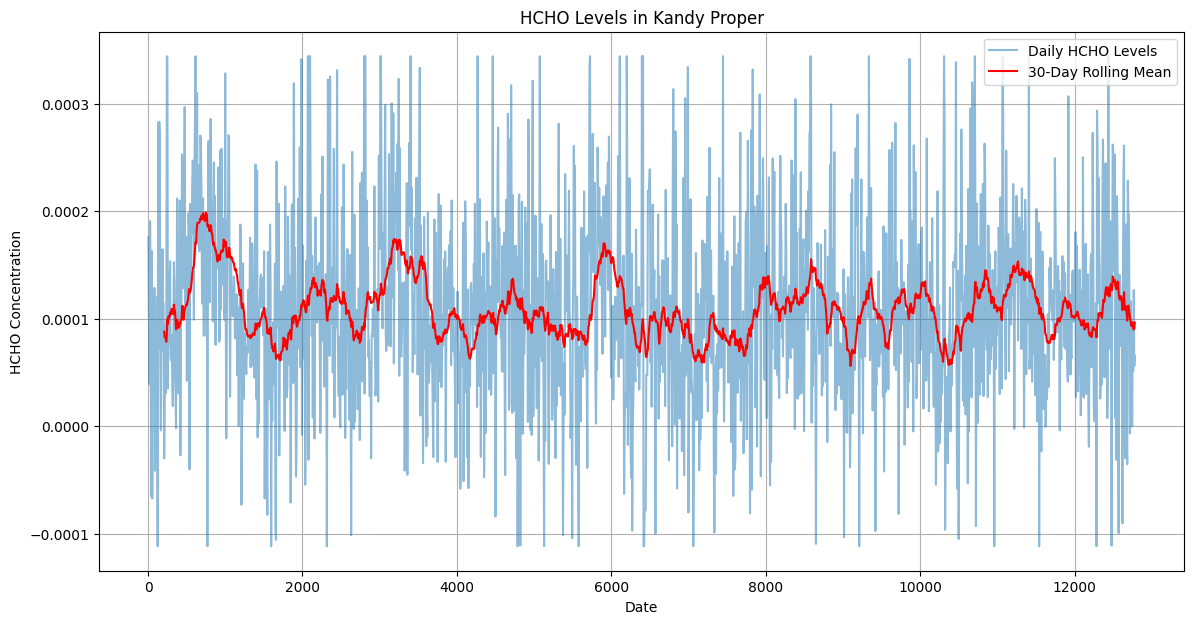

In [15]:
import matplotlib.pyplot as plt

for location in unique_locations:
    window=30
    # Filter data for the city
    city_data = combined_df[combined_df['Location'] == location]['HCHO']
    
    # Calculate the rolling mean
    rolling_data = city_data.rolling(window=window).mean()
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(city_data, label='Daily HCHO Levels', alpha=0.5)
    plt.plot(rolling_data, label=f'{window}-Day Rolling Mean', color='red')
    plt.title(f'HCHO Levels in {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()




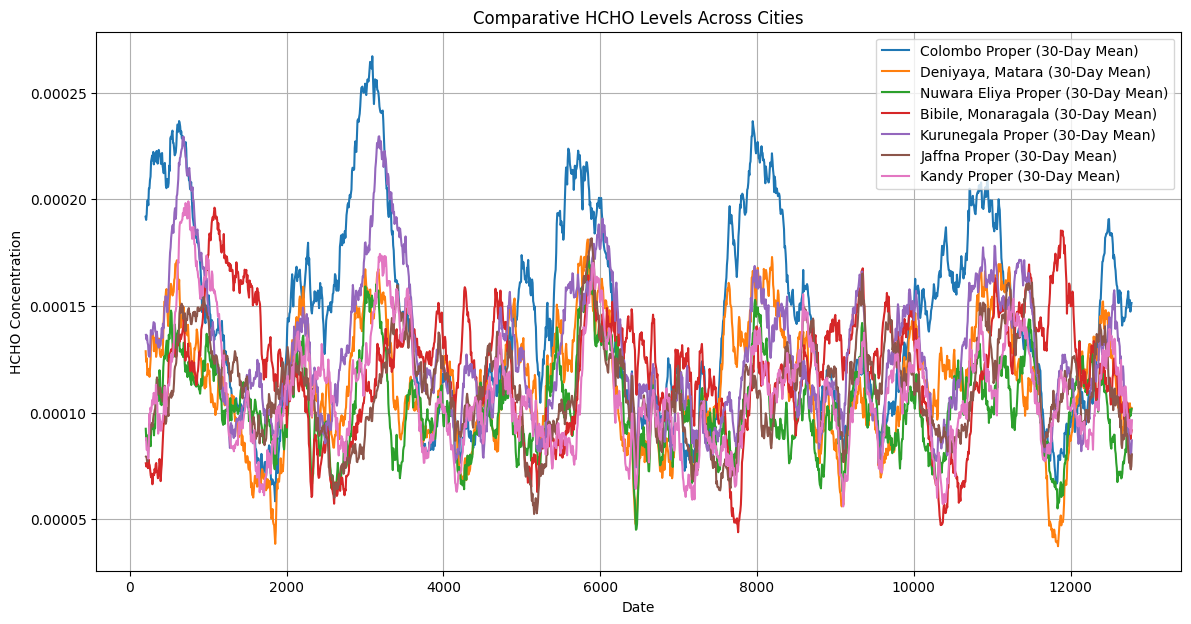

In [16]:
window=30

plt.figure(figsize=(14, 7))
for location in unique_locations:
    city_data = combined_df[combined_df['Location'] == location]['HCHO']
    rolling_data = city_data.rolling(window=window).mean()
    plt.plot(rolling_data, label=f'{location} ({window}-Day Mean)')
    
plt.title('Comparative HCHO Levels Across Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.legend()
plt.grid(True)
plt.show()
    


### Seasonal variations, residuals and trends

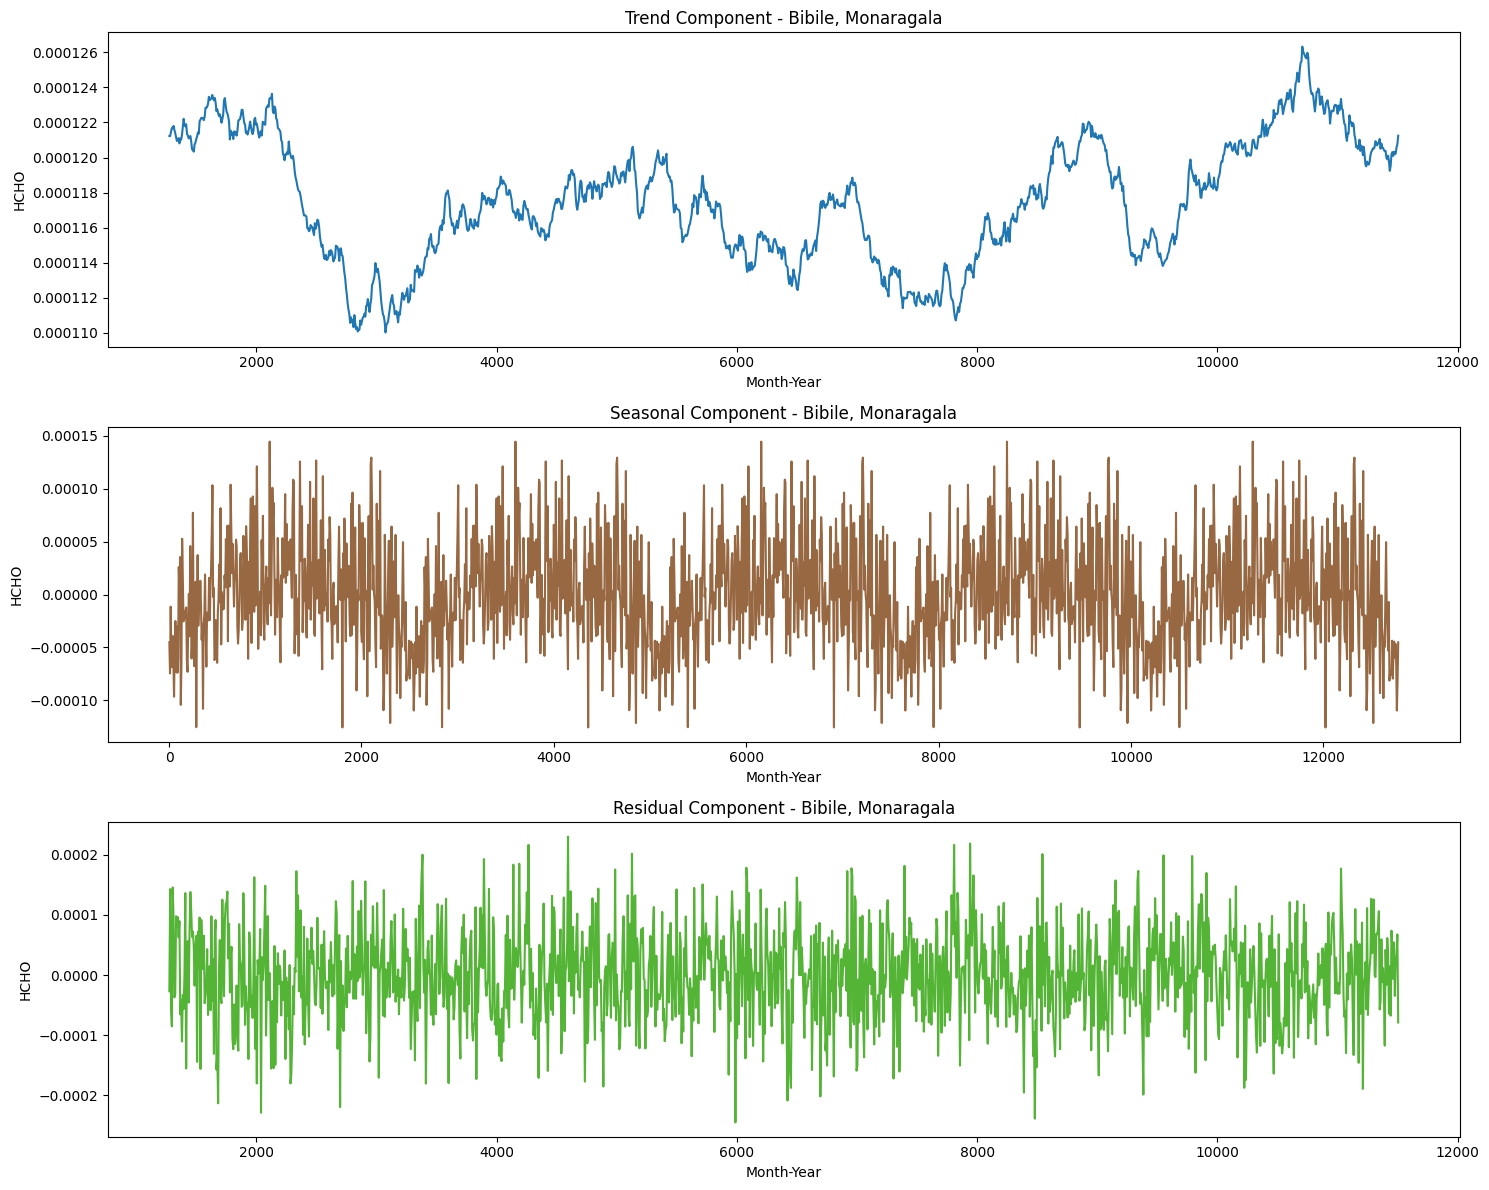

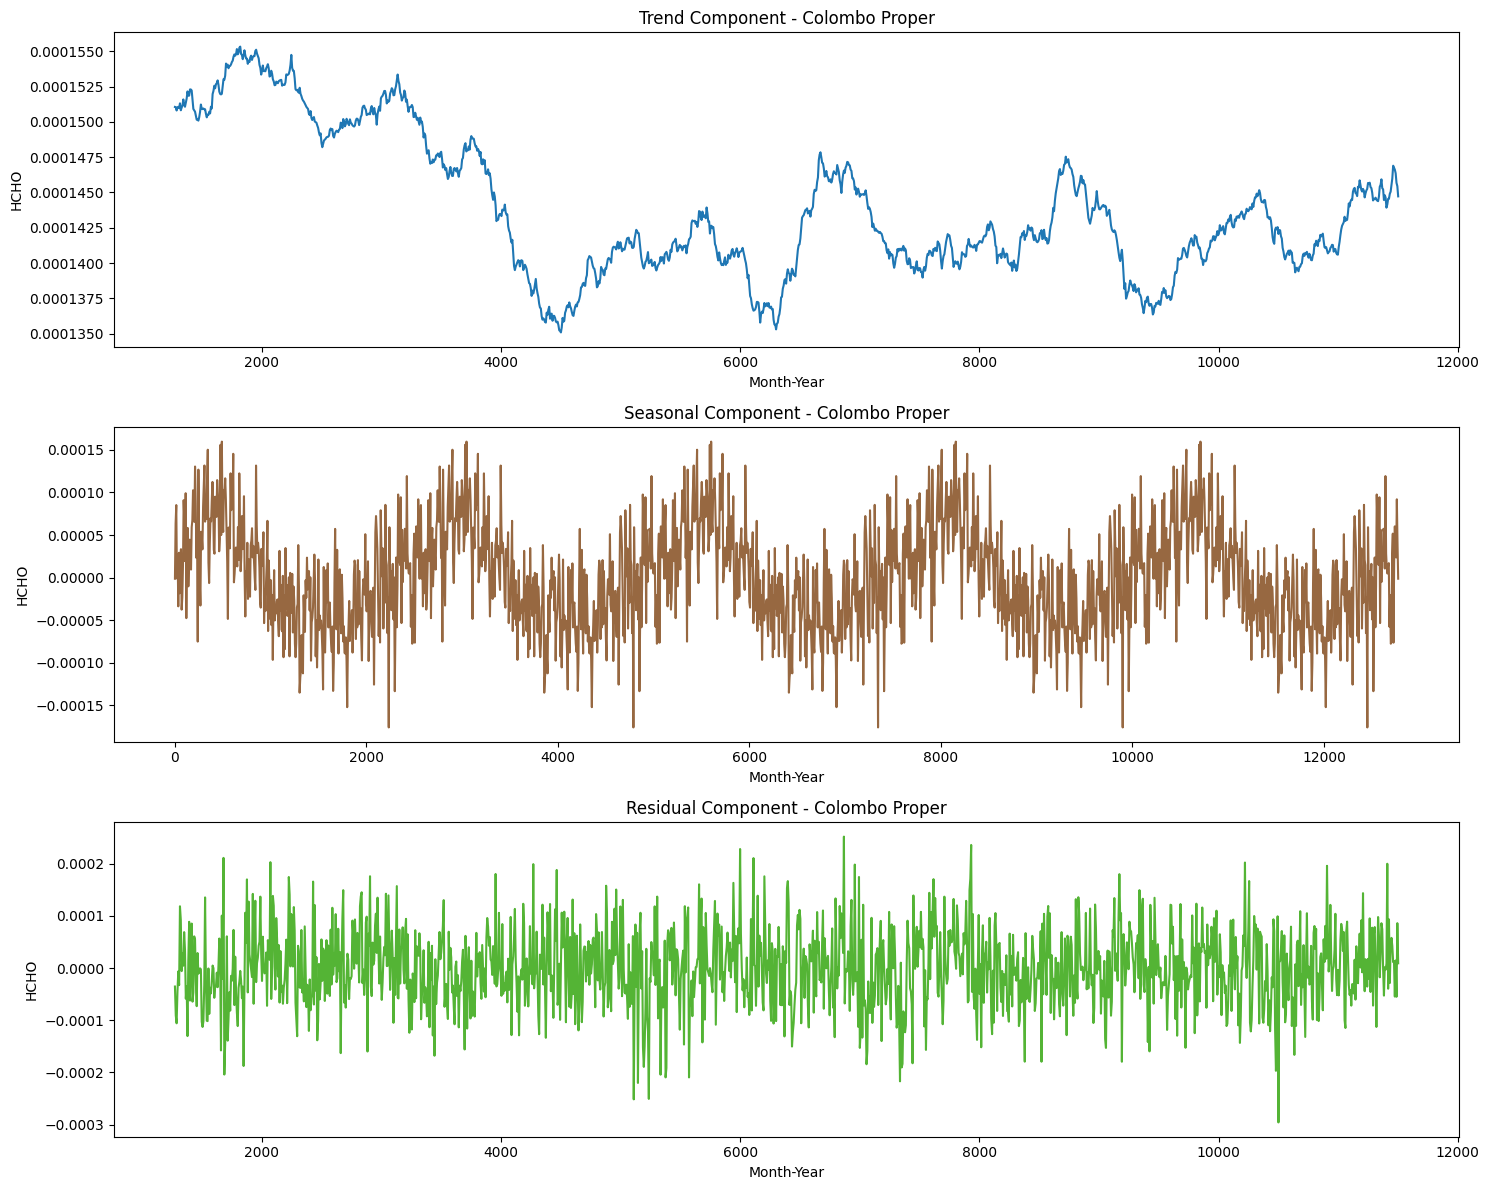

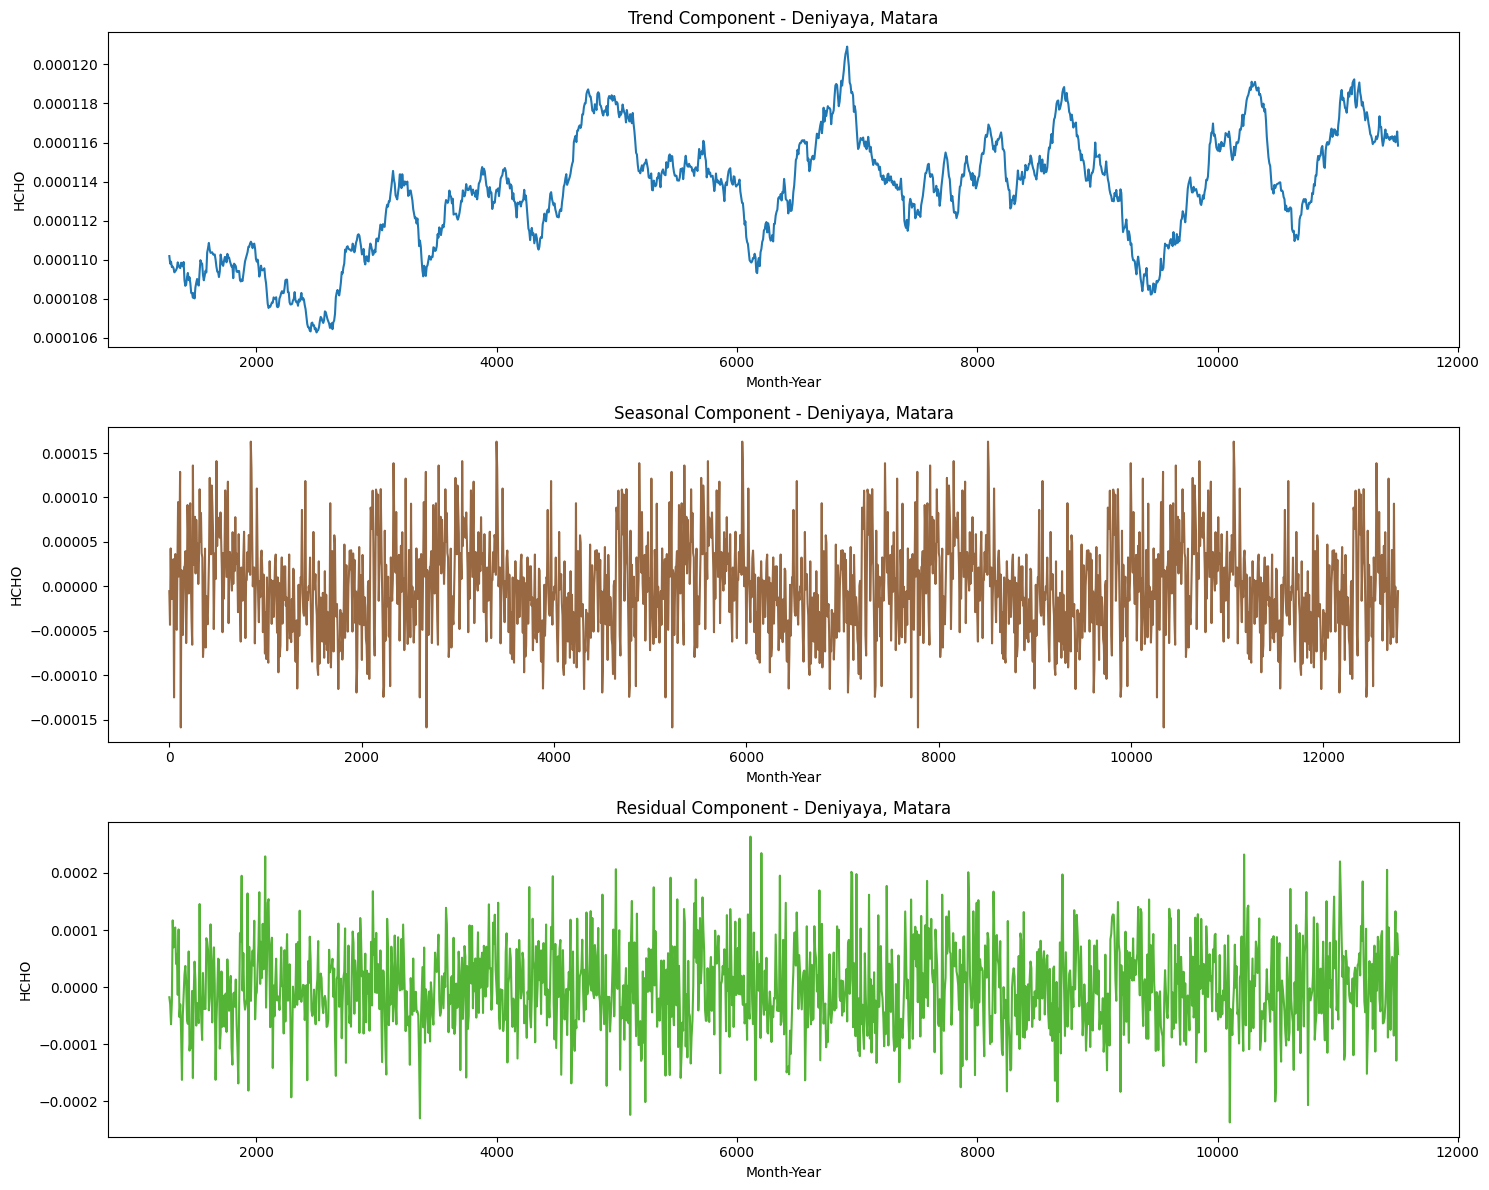

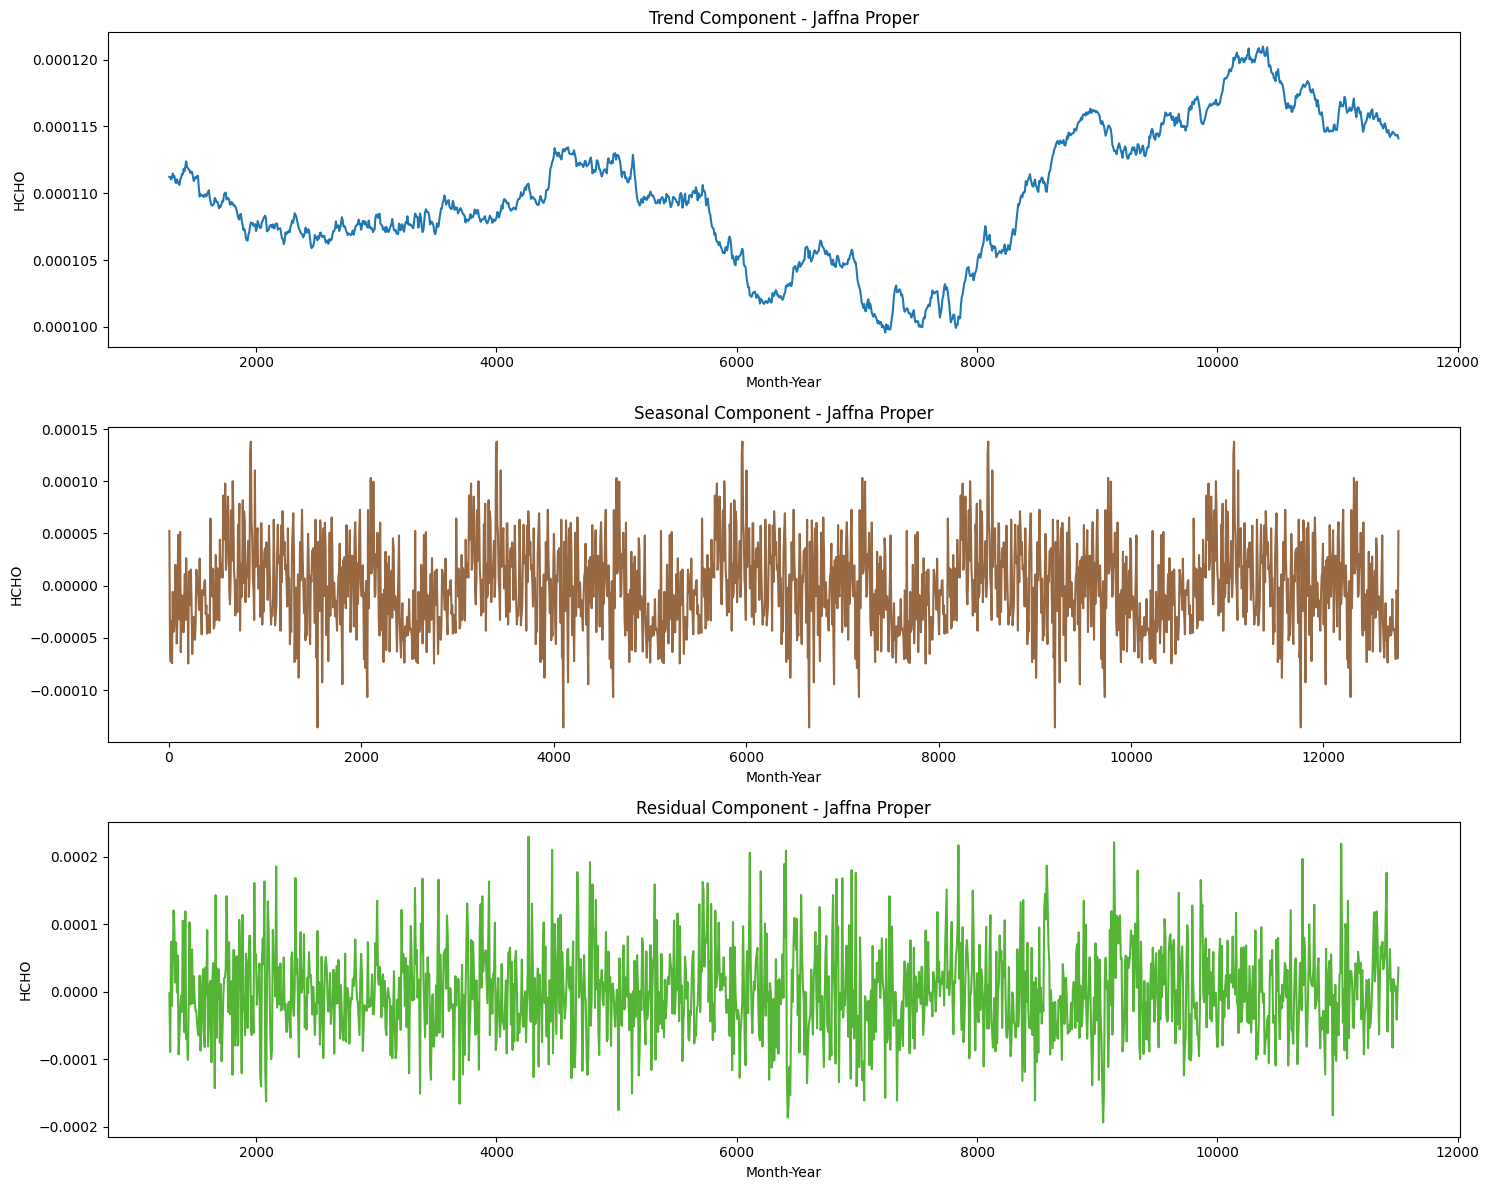

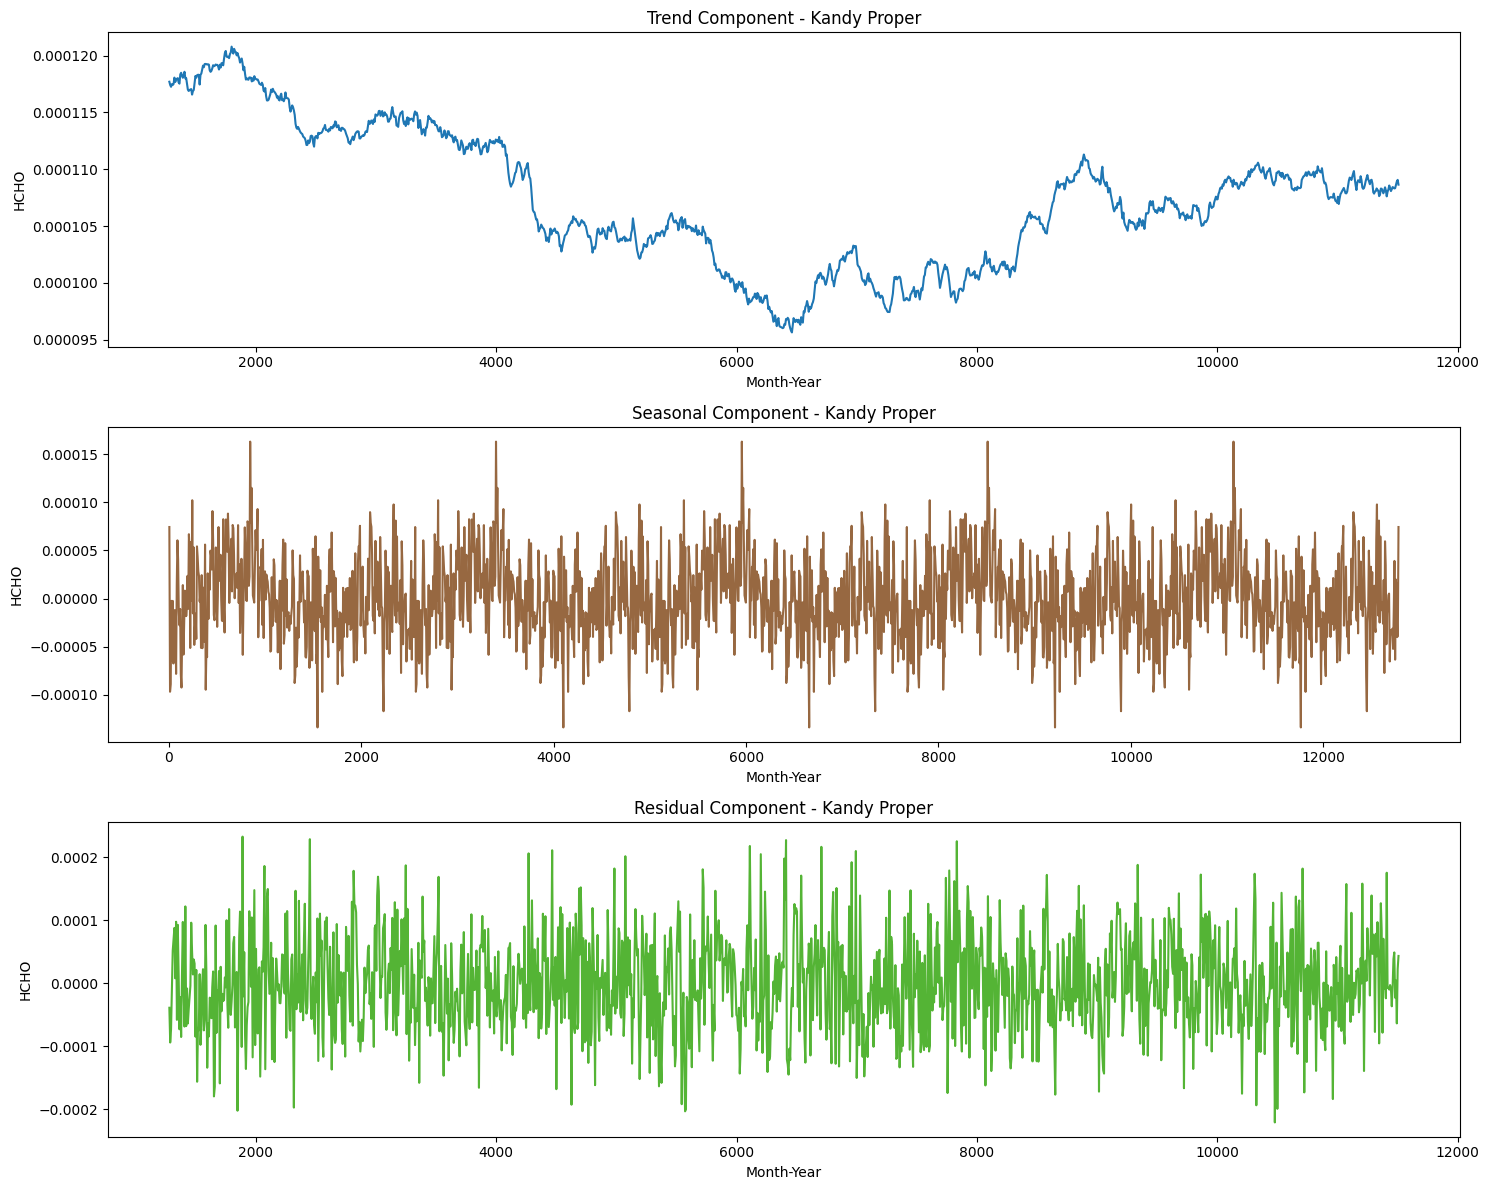

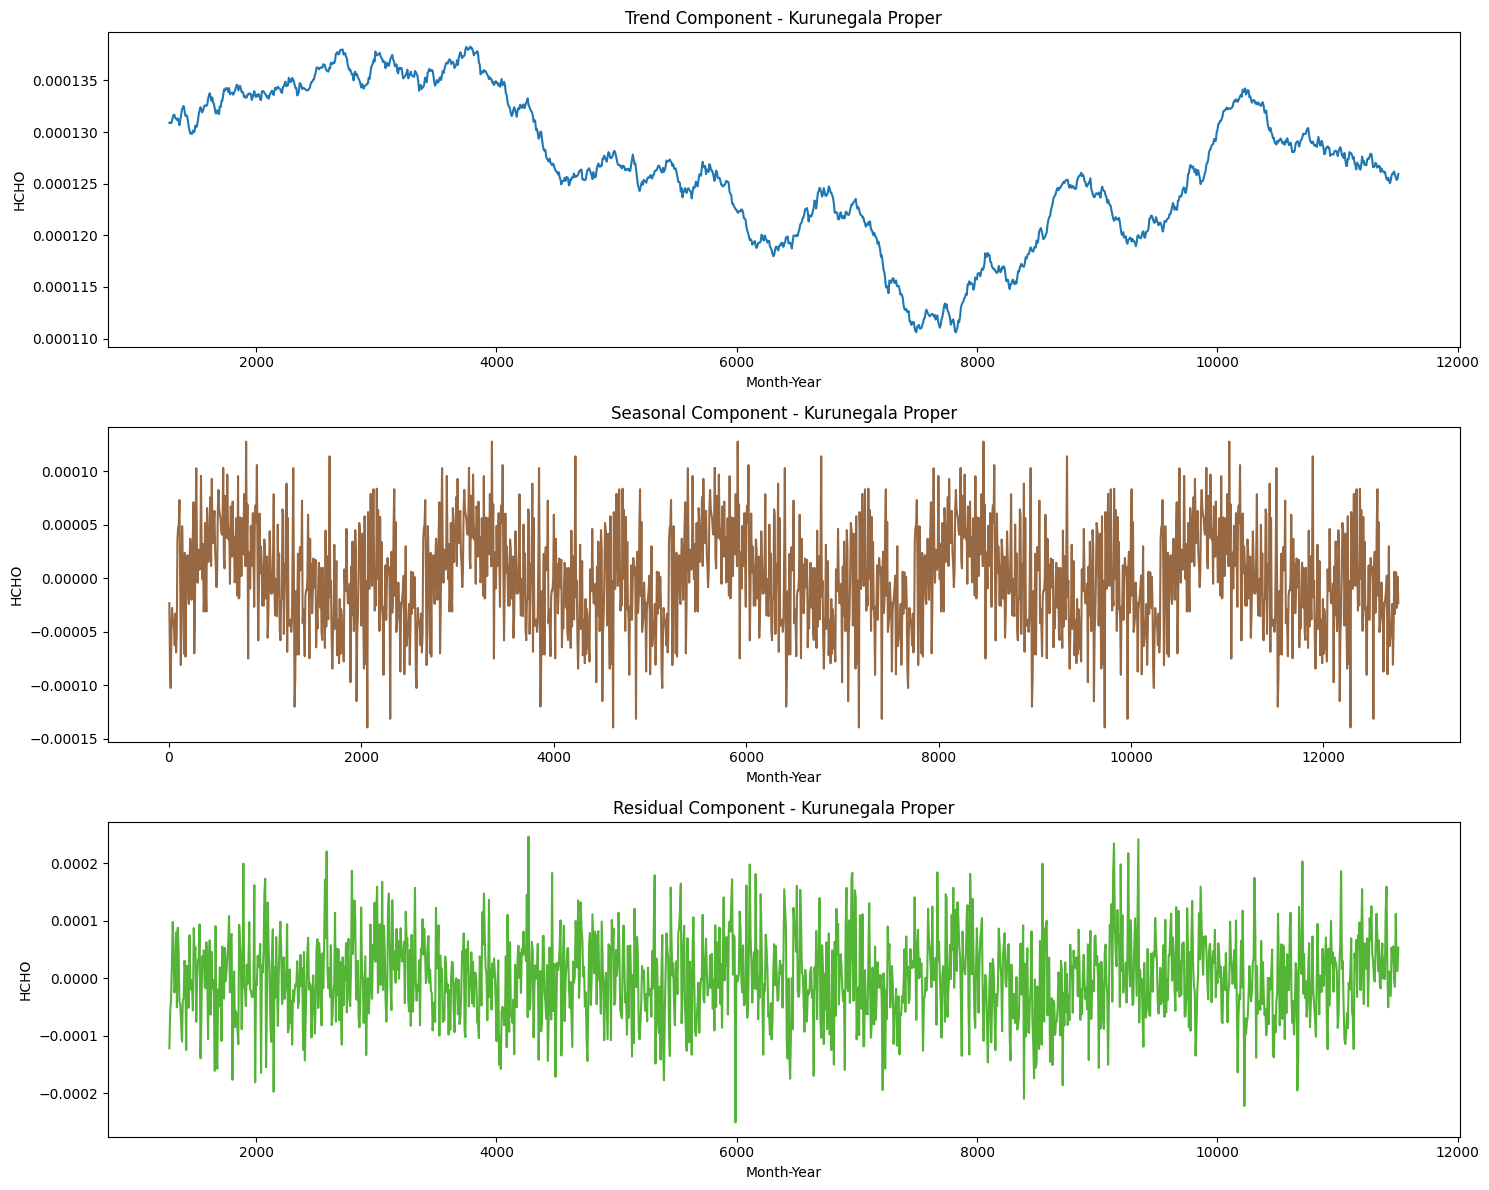

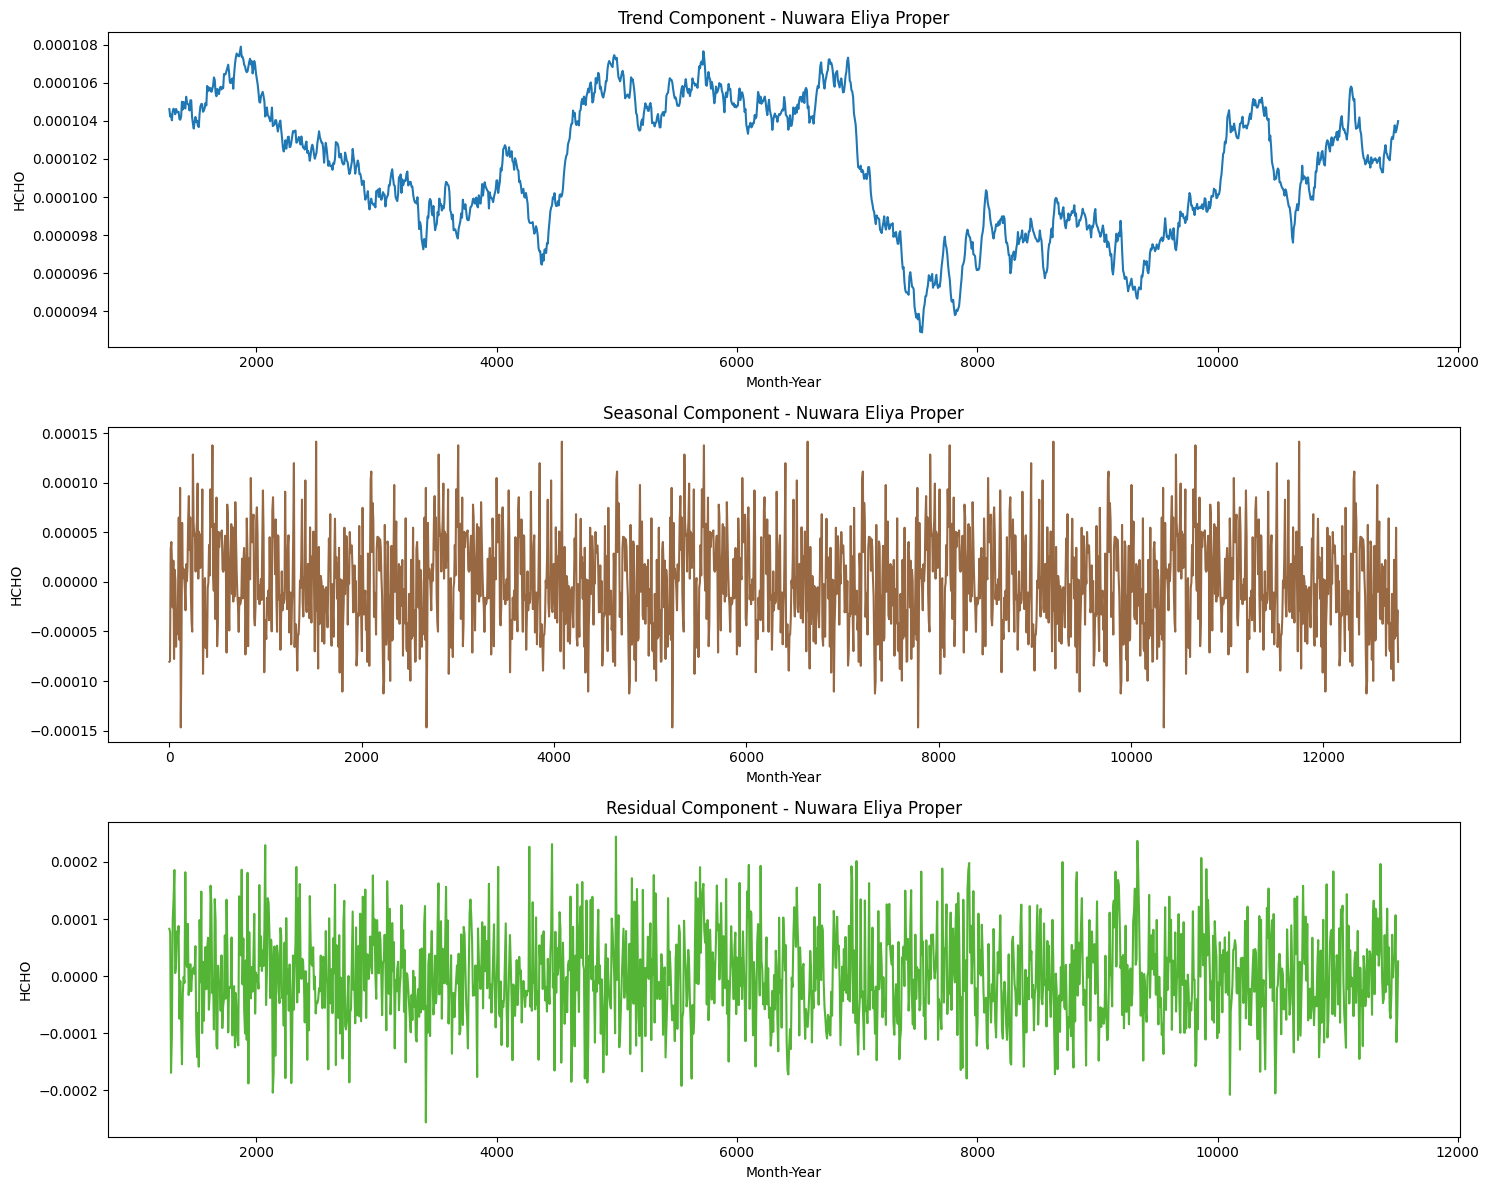

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Grouping the data by location
grouped_data = combined_df.groupby('Location')

# Decomposing the time series for each city
for city, data in grouped_data:
    # Ensure the index is sorted
    data = data.sort_index()

    # Decomposing the time series
    decomposition = seasonal_decompose(data['HCHO'], model='additive', period=365)

    # Plotting the decomposed components
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    decomposition.trend.plot(ax=ax1, title=f'Trend Component - {city}')
    ax1.set_ylabel('HCHO')
    ax1.set_xlabel('Month-Year')

    decomposition.seasonal.plot(ax=ax2, title=f'Seasonal Component - {city}', color='#976841')
    ax2.set_ylabel('HCHO')
    ax2.set_xlabel('Month-Year')

    decomposition.resid.plot(ax=ax3, title=f'Residual Component - {city}', color='#54b435')
    ax3.set_ylabel('HCHO')
    ax3.set_xlabel('Month-Year')

    plt.tight_layout()
    plt.show()